# Problem Statement
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.

## Business Problem Overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways.

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

## Project Pipeline
The project pipeline can be briefly summarized in the following four steps:

#### Data Understanding: 
Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.

#### Exploratory data analytics (EDA): 
Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.

#### Train/Test Split: 
Now you are familiar with the train/test split, which you can perform in order to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.

#### Model-Building/Hyperparameter Tuning: 
This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given dataset. You should try and see if you get a better model by the various sampling techniques.

#### Model Evaluation: 
Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced it is is more important to identify which are fraudulent transactions accurately than the non-fraudulent. Choose an appropriate evaluation metric which reflects this business goal.`

### 1.  Import Libraries and Supress Warnings

#### 1.1 Import Numpy and Pandas Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

1.2 Import Graphs

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#### 1.3 Import Model building Libraries

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,KFold

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

from sklearn.decomposition import PCA,IncrementalPCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### 1.4 Import Warnings

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### 1.5 Increase Row and Column Size

In [5]:
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 3000)
pd.set_option('float_format' , '{:f}'.format)

### 2. Reading and Understanding Data

#### 2.1 Reading Data

##### 2.1.1 Importing Train Data from CSV file

In [6]:
credit_fraud_train = pd.read_csv('fraudTrain.csv')
credit_fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


##### 2.1.2 Importing Test Data from CSV file

In [7]:
credit_fraud_test = pd.read_csv('fraudTest.csv')
credit_fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840000,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.280000,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.672900,-73.536500,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.050000,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.569700,-80.819100,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.190000,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.252900,-85.017000,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


##### 2.1.2 Checking Shape of Train & Test Data

In [8]:
print(credit_fraud_train.shape)
print(credit_fraud_test.shape)

(1296675, 23)
(555719, 23)


#### 2.2 Merging the  Dataset

##### 2.2.1 Merging the train & test Dataset

In [9]:
credit_fraud_train = credit_fraud_train.drop(credit_fraud_train.columns[0], axis=1)
credit_fraud_test = credit_fraud_test.drop(credit_fraud_test.columns[0], axis=1)

In [10]:
# Merged Dataset
credit_fraud = pd.concat([credit_fraud_train,credit_fraud_test])

In [11]:
credit_fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### 2.3 Inspecting the Merged Dataset

In [12]:
credit_fraud.shape

(1852394, 22)

In [13]:
credit_fraud.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [14]:
# To suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
credit_fraud.describe(include='all')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1852394,1852394.00000,1852394,1852394,1852394.00000,1852394,1852394,1852394,1852394,1852394,1852394,1852394.00000,1852394.00000,1852394.00000,1852394.00000,1852394,1852394,1852394,1852394.00000,1852394.00000,1852394.00000,1852394.00000
unique,1819551,nan,693,14,nan,355,486,2,999,906,51,nan,nan,nan,nan,497,984,1852394,nan,nan,nan,nan
top,2020-12-13 17:53:47,nan,fraud_Kilback LLC,gas_transport,nan,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,nan,nan,nan,nan,Film/video editor,1977-03-23,43e33433e80d23050d86a0214405f56d,nan,nan,nan,nan
freq,4,nan,6262,188029,nan,38112,40940,1014749,4392,8040,135269,nan,nan,nan,nan,13898,8044,1,nan,nan,nan,nan
mean,NaN,417386038394006464.00000,NaN,NaN,70.06357,NaN,NaN,NaN,NaN,NaN,NaN,48813.25819,38.53931,-90.22783,88643.67451,NaN,NaN,NaN,1358674218.83436,38.53898,-90.22794,0.00521
std,NaN,1309115265318020352.00000,NaN,NaN,159.25397,NaN,NaN,NaN,NaN,NaN,NaN,26881.84597,5.07147,13.74789,301487.61834,NaN,NaN,NaN,18195081.38756,5.10560,13.75969,0.07199
min,NaN,60416207185.00000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,1257.00000,20.02710,-165.67230,23.00000,NaN,NaN,NaN,1325376018.00000,19.02742,-166.67157,0.00000
25%,NaN,180042946491150.00000,NaN,NaN,9.64000,NaN,NaN,NaN,NaN,NaN,NaN,26237.00000,34.66890,-96.79800,741.00000,NaN,NaN,NaN,1343016823.75000,34.74012,-96.89944,0.00000
50%,NaN,3521417320836166.00000,NaN,NaN,47.45000,NaN,NaN,NaN,NaN,NaN,NaN,48174.00000,39.35430,-87.47690,2443.00000,NaN,NaN,NaN,1357089331.00000,39.36890,-87.44069,0.00000
75%,NaN,4642255475285942.00000,NaN,NaN,83.10000,NaN,NaN,NaN,NaN,NaN,NaN,72042.00000,41.94040,-80.15800,20328.00000,NaN,NaN,NaN,1374581485.25000,41.95626,-80.24511,0.00000


#### 2.4 Checking the Fraud Percentage in the Data Frame

In [16]:
credit_fraud.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [17]:
credit_fraud_percentage=credit_fraud[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
credit_fraud_percentage.columns=['is_fraud','count']
credit_fraud_percentage['percentage']=round((credit_fraud_percentage['count']/credit_fraud_percentage['count'].sum())*100,2)
credit_fraud_percentage

,is_fraud,count,percentage
0,0,1842743,99.48000
1,1,9651,0.52000


### 3. Data Cleaning

#### 3.1 Creating copy of dataset

In [18]:
credit_fraud1 = credit_fraud.copy()

#### 3.2 Checking Null Values

In [19]:
round(100*(credit_fraud1.isnull().sum())/len(credit_fraud1), 2)

trans_date_trans_time   0.00000
cc_num                  0.00000
merchant                0.00000
category                0.00000
amt                     0.00000
first                   0.00000
last                    0.00000
gender                  0.00000
street                  0.00000
city                    0.00000
state                   0.00000
zip                     0.00000
lat                     0.00000
long                    0.00000
city_pop                0.00000
job                     0.00000
dob                     0.00000
trans_num               0.00000
unix_time               0.00000
merch_lat               0.00000
merch_long              0.00000
is_fraud                0.00000
dtype: float64

#### 3.3 Conversion of Datatypes

In [20]:
# Converting date columns to datetime format

credit_fraud1['trans_date_trans_time']=pd.to_datetime(credit_fraud1['trans_date_trans_time'])
credit_fraud1['trans_date']=credit_fraud1['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
credit_fraud1['trans_time']=credit_fraud1['trans_date_trans_time'].dt.strftime('%H:%M:%S')
credit_fraud1['trans_date']=pd.to_datetime(credit_fraud1['trans_date'])
credit_fraud1['dob'] = pd.to_datetime(credit_fraud1['dob'])
credit_fraud1['trans_day'] = credit_fraud1['trans_date_trans_time'].dt.day_name()
credit_fraud1['trans_month'] = pd.DatetimeIndex(credit_fraud1['trans_date']).month
credit_fraud1['trans_year'] = credit_fraud1['trans_date_trans_time'].dt.year
credit_fraud1['trans_hour'] = credit_fraud1['trans_date_trans_time'].dt.hour

In [21]:
credit_fraud1.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
trans_time                       object
trans_day                        object


In [22]:
credit_fraud1.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
trans_time                       object
trans_day                        object


#### 3.4 Creation of new column

In [23]:
# Finding the age of the customer 
credit_fraud1['cust_age'] = np.round((credit_fraud1['trans_date_trans_time']- 
                            credit_fraud1['dob'])/np.timedelta64(1,'Y'))
credit_fraud1['cust_age'] = credit_fraud1['cust_age'].astype('int64')
credit_fraud1['cust_age']

0         31
1         41
2         57
3         52
4         33
          ..
555714    55
555715    21
555716    39
555717    55
555718    28
Name: cust_age, Length: 1852394, dtype: int64

In [24]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

credit_fraud1['trans_lat_dist'] = abs(round(credit_fraud1['merch_lat']-credit_fraud1['lat'],3))
credit_fraud1['trans_long_dist'] = abs(round(credit_fraud1['merch_long']-credit_fraud1['long'],3))
credit_fraud1[['merch_lat','lat','trans_lat_dist','merch_long','long','trans_long_dist']].head()

,merch_lat,lat,trans_lat_dist,merch_long,long,trans_long_dist
0,36.01129,36.07880,0.06800,-82.04832,-81.17810,0.87000
1,49.15905,48.88780,0.27100,-118.18646,-118.21050,0.02400
2,43.15070,42.18080,0.97000,-112.15448,-112.26200,0.10800
3,47.03433,46.23060,0.80400,-112.56107,-112.11380,0.44700
4,38.67500,38.42070,0.25400,-78.63246,-79.46290,0.83000


#### 3.5 Binning of Columns

In [25]:
credit_fraud1.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
trans_date                   730
trans_time                 86400
trans_day                      7
trans_month                   12
trans_year                     2
trans_hour                    24
cust_age                      83
trans_lat_dist              1001
trans_long

In [26]:
# Creating Age Group Column
credit_fraud1['cust_age_group'] = pd.cut (credit_fraud1['cust_age'],
                                  bins = [0,20,30,40,50,100],
                                  labels = ['0-20','20-30','30-40','40-50','50 above'])

credit_fraud1['cust_age_group'].value_counts(ascending=True)

0-20         54880
20-30       302436
30-40       415647
40-50       431809
50 above    647622
Name: cust_age_group, dtype: int64

In [27]:
credit_fraud1.amt.value_counts(ascending=False)

1.14000       779
1.10000       745
1.04000       744
1.08000       741
1.25000       737
             ... 
532.04000       1
1978.24000      1
3069.89000      1
425.57000       1
553.46000       1
Name: amt, Length: 60616, dtype: int64

In [28]:
# Creating Ammount Range Column
credit_fraud1['amt_range'] = pd.cut (credit_fraud1['amt'],
                             bins = [0,1,2,3,4,5,6],
                             labels= ['0-500','500-1000', '1000-15000','15000-20000','20000-25000','25000-30000'])

credit_fraud1['amt_range'].value_counts(ascending=True)

0-500            332
25000-30000    51194
20000-25000    52725
15000-20000    55008
1000-15000     58443
500-1000       66251
Name: amt_range, dtype: int64

In [29]:
credit_fraud1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,trans_day,trans_month,trans_year,trans_hour,cust_age,trans_lat_dist,trans_long_dist,cust_age_group,amt_range
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.07880,-81.17810,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0,2019-01-01,00:00:18,Tuesday,1,2019,0,31,0.06800,0.87000,30-40,20000-25000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.88780,-118.21050,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0,2019-01-01,00:00:44,Tuesday,1,2019,0,41,0.27100,0.02400,40-50,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18080,-112.26200,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0,2019-01-01,00:00:51,Tuesday,1,2019,0,57,0.97000,0.10800,50 above,NaN
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23060,-112.11380,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03433,-112.56107,0,2019-01-01,00:01:16,Tuesday,1,2019,0,52,0.80400,0.44700,50 above,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42070,-79.46290,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67500,-78.63246,0,2019-01-01,00:03:06,Tuesday,1,2019,0,33,0.25400,0.83000,30-40,NaN


In [ ]:
credit_fraud1.shape

#### 3.6 Setting Different columns

In [31]:
# Setting Numerial columns 
numerical_col = credit_fraud1.select_dtypes(exclude=['object','datetime64[ns]','category'])
numerical_col.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_year,trans_hour,cust_age,trans_lat_dist,trans_long_dist
0,2703186189652095,4.97000,28654,36.07880,-81.17810,3495,1325376018,36.01129,-82.04832,0,1,2019,0,31,0.06800,0.87000
1,630423337322,107.23000,99160,48.88780,-118.21050,149,1325376044,49.15905,-118.18646,0,1,2019,0,41,0.27100,0.02400
2,38859492057661,220.11000,83252,42.18080,-112.26200,4154,1325376051,43.15070,-112.15448,0,1,2019,0,57,0.97000,0.10800
3,3534093764340240,45.00000,59632,46.23060,-112.11380,1939,1325376076,47.03433,-112.56107,0,1,2019,0,52,0.80400,0.44700
4,375534208663984,41.96000,24433,38.42070,-79.46290,99,1325376186,38.67500,-78.63246,0,1,2019,0,33,0.25400,0.83000


In [32]:
cred_numer_col = credit_fraud1 [["amt","zip","city_pop","unix_time","trans_lat_dist","trans_long_dist","is_fraud"]]
cred_numer_col.head()

,amt,zip,city_pop,unix_time,trans_lat_dist,trans_long_dist,is_fraud
0,4.97000,28654,3495,1325376018,0.06800,0.87000,0
1,107.23000,99160,149,1325376044,0.27100,0.02400,0
2,220.11000,83252,4154,1325376051,0.97000,0.10800,0
3,45.00000,59632,1939,1325376076,0.80400,0.44700,0
4,41.96000,24433,99,1325376186,0.25400,0.83000,0


In [39]:
# Setting Categorical columns 
categorical_col = credit_fraud1.select_dtypes(exclude=['int64','datetime64[ns]','float'])
categorical_col.head()

,merchant,category,first,last,gender,street,city,state,job,trans_num,trans_time,trans_day,cust_age_group,amt_range
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,00:00:18,Tuesday,30-40,20000-25000
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,00:00:44,Tuesday,40-50,NaN
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,00:00:51,Tuesday,50 above,NaN
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,00:01:16,Tuesday,50 above,NaN
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,00:03:06,Tuesday,30-40,NaN


### 4. Checking Value Count in Different columns

In [40]:
for col in credit_fraud1.columns[2:]:
    print(col.upper(), end=': ')
    print(credit_fraud1[col].unique())
    print()

MERCHANT: ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvorson Group'
 'fraud_Harber Inc' 'fraud

#### 4.1 Amt Range

In [41]:
credit_fraud1.amt_range.value_counts()

500-1000       66251
1000-15000     58443
15000-20000    55008
20000-25000    52725
25000-30000    51194
0-500            332
Name: amt_range, dtype: int64

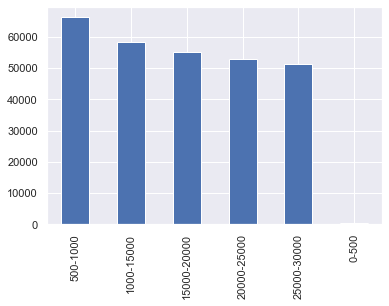

In [42]:
credit_fraud1['amt_range'].value_counts().plot.bar()
plt.show()

***Analysis:-***

***The maximum number of transaction is for the ammount between 500-1000***

#### 4.2 Customer Age Group

In [43]:
credit_fraud1.cust_age_group.value_counts()

50 above    647622
40-50       431809
30-40       415647
20-30       302436
0-20         54880
Name: cust_age_group, dtype: int64

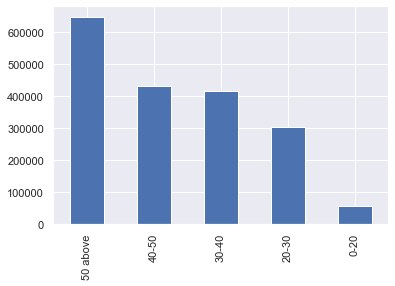

In [44]:
credit_fraud1['cust_age_group'].value_counts().plot.bar()
plt.show()

***Analysis:-***

***The maximum number of transaction is done by people of age group between 50 above***

#### 4.3 Gender

In [45]:
credit_fraud1.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

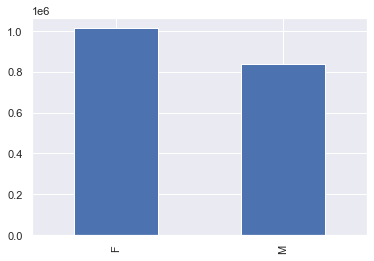

In [46]:
credit_fraud1['gender'].value_counts().plot.bar()
plt.show()

***Analysis:-***

***The maximum number of transaction is done by female***

#### 4.4 Category

In [47]:
credit_fraud1.category.value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

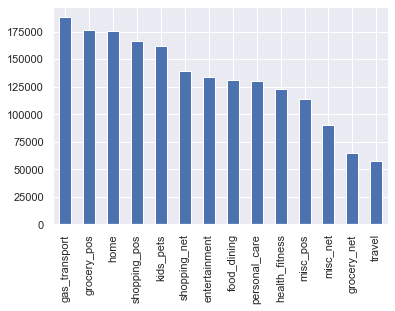

In [48]:
credit_fraud1['category'].value_counts().plot.bar()
plt.show()

***Analysis:-***

***The maximum number of transaction is for the category "gas_transport" and minimum is for the "travel" category***

#### 4.5 Transaction Day

In [49]:
credit_fraud1.trans_day.value_counts()

Monday       369418
Sunday       343677
Tuesday      270340
Saturday     263227
Friday       215078
Thursday     206741
Wednesday    183913
Name: trans_day, dtype: int64

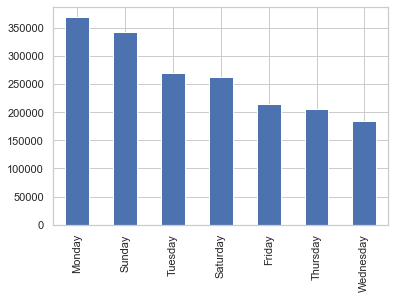

In [176]:
credit_fraud1['trans_day'].value_counts().plot.bar()
plt.show()

***Analysis:-***

***The maximum number of transaction is done on Monday amd minimum on Wednesday***

#### 4.6 Transaction Month

In [50]:
credit_fraud1.trans_month.value_counts()

12    280598
8     176118
6     173869
7     172444
5     146875
3     143789
11    143056
9     140185
10    138106
4     134970
1     104727
2      97657
Name: trans_month, dtype: int64

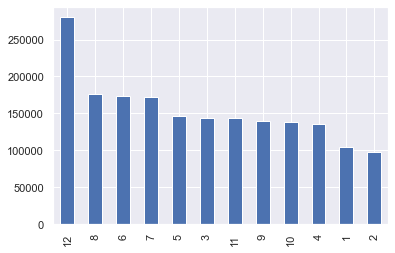

In [51]:
credit_fraud1['trans_month'].value_counts().plot.bar()
plt.show()

***Analysis:-***

***The maximum number of transaction is done in December and minimum done in Feburay***

#### 4.7 Transaction Year

In [52]:
credit_fraud1.trans_year.value_counts()

2020    927544
2019    924850
Name: trans_year, dtype: int64

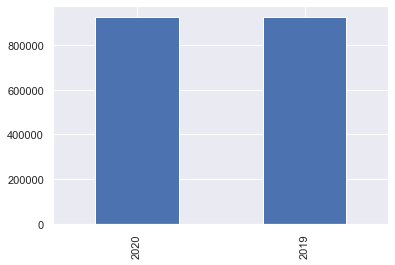

In [53]:
credit_fraud1['trans_year'].value_counts().plot.bar()
plt.show()

***Analysis:-***

***The are almost equal number of transaction done both the years***

#### 4.8 Transaction Hour

In [54]:
credit_fraud1.trans_hour.value_counts(ascending=True).sort_values

<bound method Series.sort_values of 4     59938
5     60088
11    60170
9     60231
7     60301
10    60320
6     60406
8     60498
0     60655
2     60796
3     60968
1     61330
20    93081
14    93089
12    93294
19    93433
15    93439
13    93492
17    93514
21    93738
18    94052
16    94289
22    95370
23    95902
Name: trans_hour, dtype: int64>

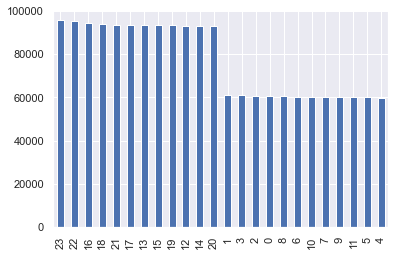

In [55]:
credit_fraud1['trans_hour'].value_counts().plot.bar()
plt.show()

***Analysis:-***

***The minimum number of transaction is done in in 1st of the day and maximum number of transactions are done in 2nd half of the day***

#### 4.9 Merchant Count

In [56]:
credit_fraud1.merchant.value_counts(normalize=True)

fraud_Kilback LLC                             0.00338
fraud_Cormier LLC                             0.00283
fraud_Schumm PLC                              0.00280
fraud_Kuhn LLC                                0.00272
fraud_Boyer PLC                               0.00270
fraud_Dickinson Ltd                           0.00267
fraud_Emard Inc                               0.00209
fraud_Cummerata-Jones                         0.00208
fraud_Corwin-Collins                          0.00208
fraud_Rodriguez Group                         0.00207
fraud_Kling Inc                               0.00207
fraud_Erdman-Kertzmann                        0.00207
fraud_Parisian and Sons                       0.00207
fraud_Huels-Hahn                              0.00207
fraud_Stroman, Hudson and Erdman              0.00207
fraud_Kutch LLC                               0.00207
fraud_Jenkins, Hauck and Friesen              0.00206
fraud_Prohaska-Murray                         0.00206
fraud_Olson, Becker and Koch

#### 4.10 Job Count

In [57]:
credit_fraud1.job.value_counts(normalize=True,ascending=False)

Film/video editor                                             0.00750
Exhibition designer                                           0.00711
Surveyor, land/geomatics                                      0.00671
Naval architect                                               0.00671
Materials engineer                                            0.00632
Designer, ceramics/pottery                                    0.00631
Environmental consultant                                      0.00592
Financial adviser                                             0.00592
Systems developer                                             0.00592
IT trainer                                                    0.00591
Copywriter, advertising                                       0.00553
Scientist, audiological                                       0.00552
Chartered public finance accountant                           0.00551
Chief Executive Officer                                       0.00551
Podiatrist          

#### 4.11 State Count

In [58]:
credit_fraud1.state.value_counts(normalize=True)

TX   0.07302
NY   0.06447
PA   0.06164
CA   0.04345
OH   0.03597
MI   0.03554
IL   0.03358
FL   0.03281
AL   0.03159
MO   0.02964
MN   0.02453
AR   0.02408
NC   0.02329
VA   0.02254
WI   0.02253
SC   0.02253
KY   0.02212
IN   0.02134
IA   0.02095
OK   0.02054
MD   0.02016
GA   0.02016
WV   0.01972
NJ   0.01897
NE   0.01858
KS   0.01778
MS   0.01621
LA   0.01617
WY   0.01499
WA   0.01460
OR   0.01426
TN   0.01345
ME   0.01265
NM   0.01265
ND   0.01144
CO   0.01067
SD   0.00949
MA   0.00948
VT   0.00908
MT   0.00907
AZ   0.00829
UT   0.00829
NH   0.00633
CT   0.00593
NV   0.00435
ID   0.00434
DC   0.00277
HI   0.00197
AK   0.00160
RI   0.00040
DE   0.00000
Name: state, dtype: float64

#### 4.12 City Count

In [59]:
credit_fraud1.city.value_counts(normalize=True)

Birmingham                  0.00434
San Antonio                 0.00395
Utica                       0.00395
Phoenix                     0.00394
Meridian                    0.00393
Warren                      0.00355
Conway                      0.00355
Cleveland                   0.00355
Thomas                      0.00355
Houston                     0.00317
Arcadia                     0.00316
Naples                      0.00316
Brandon                     0.00315
Fulton                      0.00315
Indianapolis                0.00315
Burbank                     0.00315
Dallas                      0.00278
Washington                  0.00277
Detroit                     0.00277
Hudson                      0.00277
Lakeland                    0.00276
Allentown                   0.00276
Fort Washakie               0.00276
Lahoma                      0.00276
Philadelphia                0.00276
Andrews                     0.00276
Huntsville                  0.00275
Orient                      

### 5. Checking Outliers

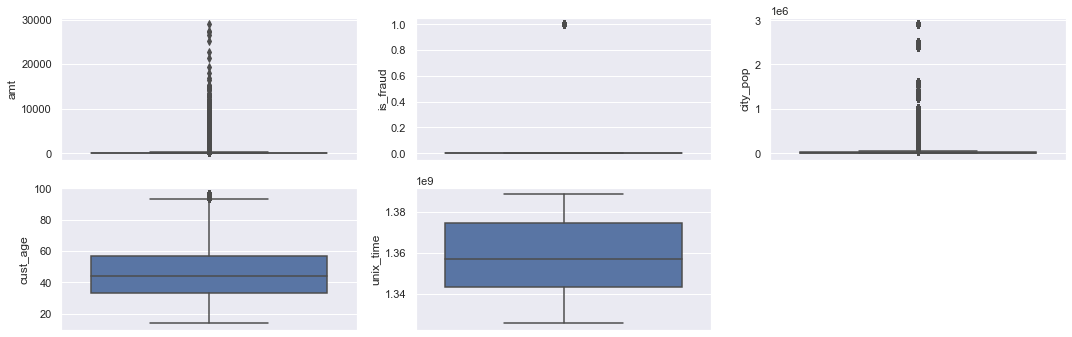

In [60]:
# Plot the box plot to check the outliers in the dataset
num_col1 = ['amt','is_fraud','city_pop','cust_age','unix_time']
plt.figure(figsize=(18,12))

i = 1
for col in num_col1:
    plt.subplot(4,3,i)
    sns.boxplot(y=col, data=credit_fraud1)
    i+=1

***Analyis:-***

***From the boxplot we can infer that There are no outliers in the dataset***

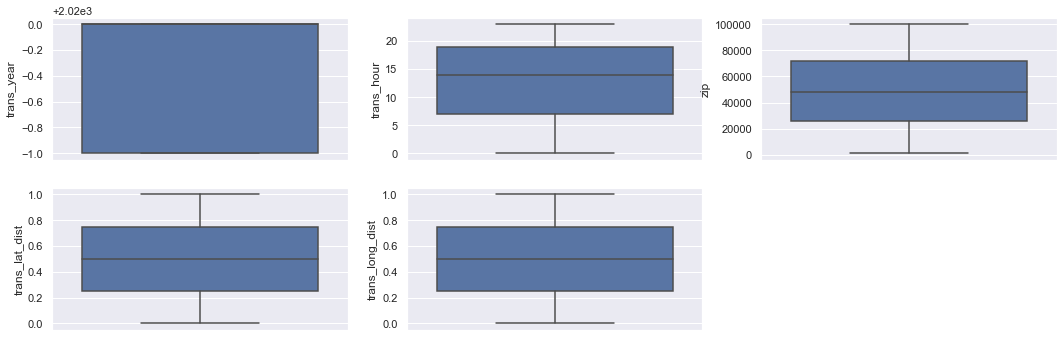

In [61]:
# Plot the box plot to check the outliers in the dataset
num_col2 = ['trans_year','trans_hour','zip','trans_lat_dist','trans_long_dist']
plt.figure(figsize=(18,12))

i = 1
for col in num_col2:
    plt.subplot(4,3,i)
    sns.boxplot(y=col, data=credit_fraud1)
    i+=1

***Analyis:-***

***From the boxplot we can infer that There are no outliers in the dataset***

### 6. Data Imbalance

#### 6.1 Checking Data Imbalance using Pie Chart

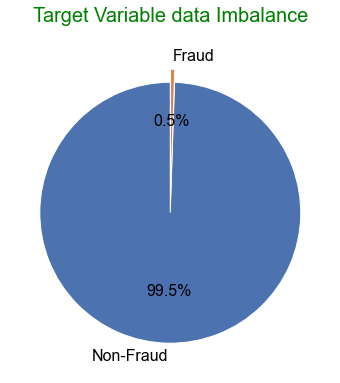

In [63]:
# Plot Imbalance in a Pie Chart
lables = 'Non-Fraud','Fraud'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(credit_fraud1['is_fraud'].value_counts(), explode=explode, labels=lables, autopct='%.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Target Variable data Imbalance\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

#### 6.2 Checking the imbalance count

In [64]:
# Check the imbalance of the data

nfraud_count = credit_fraud1[credit_fraud1['is_fraud'] == 0]['amt'].count()
fraud_target = credit_fraud1[credit_fraud1['is_fraud'] == 1]
nonfraud_target = credit_fraud1[credit_fraud1['is_fraud'] == 0]
credit_fraud1['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

### 7. EDA

#### 7.1.1 Visualization of correlations using Heat Maps

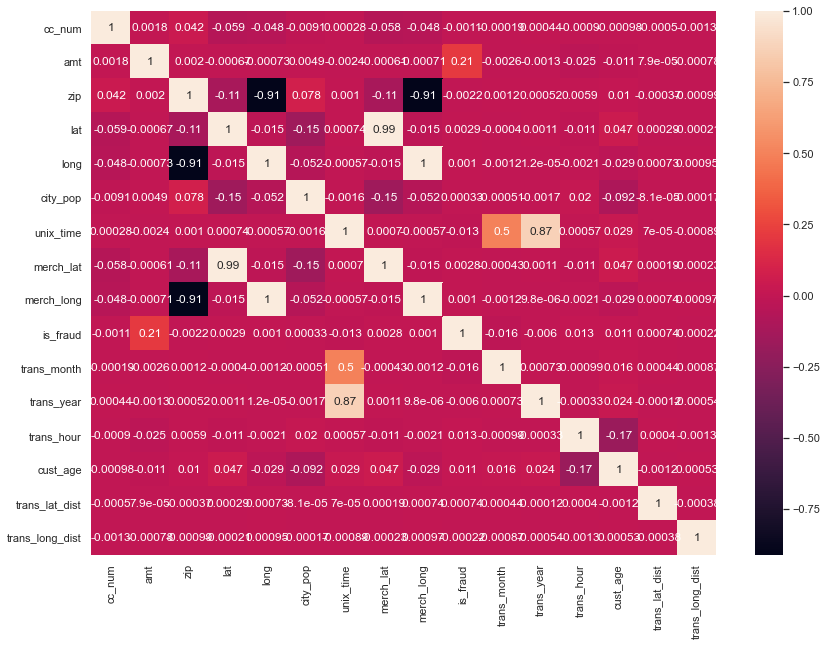

In [65]:
plt.figure(figsize=(14, 10))
sns.heatmap(credit_fraud1.corr(),annot=True)
plt.show()

***Analysis :-***

- It can be seen that merch_lat and lat, merch_long and long are positively correlated whereas merch_long and zip are negatively correlated. we can remove one of the correlated columns.

#### 7.1.2 Checking highly correlated variable

In [67]:
# columns pairs in order of highest absolute correlation
credit_fraud1.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

trans_long_dist  trans_long_dist   1.00000
long             merch_long        0.99912
lat              merch_lat         0.99358
long             zip               0.90979
merch_long       zip               0.90898
trans_year       unix_time         0.86724
unix_time        trans_month       0.49673
is_fraud         amt               0.20931
cust_age         trans_hour        0.17311
city_pop         lat               0.15482
                 merch_lat         0.15386
lat              zip               0.11455
dtype: float64

#### 7.1.3. Removing highly correlated variable

In [68]:
credit_fraud1 = credit_fraud1.drop(['trans_date_trans_time', 'merch_lat','merch_long','lat','long'], axis=1)
credit_fraud1.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_time,trans_day,trans_month,trans_year,trans_hour,cust_age,trans_lat_dist,trans_long_dist,cust_age_group,amt_range
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18,Tuesday,1,2019,0,31,0.06800,0.87000,30-40,20000-25000
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44,Tuesday,1,2019,0,41,0.27100,0.02400,40-50,NaN
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51,Tuesday,1,2019,0,57,0.97000,0.10800,50 above,NaN
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,2019-01-01,00:01:16,Tuesday,1,2019,0,52,0.80400,0.44700,50 above,NaN
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2019-01-01,00:03:06,Tuesday,1,2019,0,33,0.25400,0.83000,30-40,NaN


In [2]:
credit_fraud1.shape

NameError: name 'credit_fraud1' is not defined

#### 7.2 Univariate Analysis

 ##### 7.2.1 Univariate Analysis of Numerical Columns

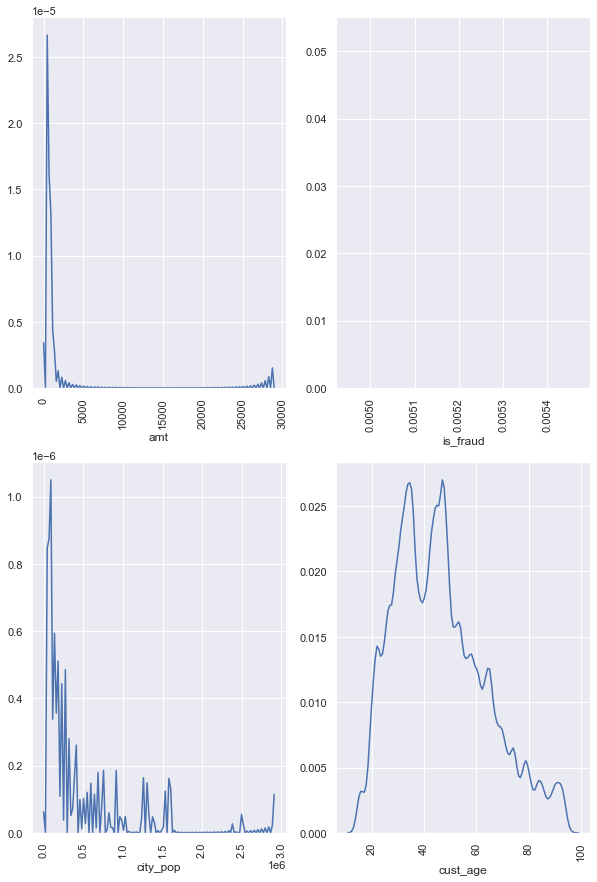

In [72]:
# Plotting dist plot for numerical columns
num_col1 = ['amt','is_fraud','city_pop','cust_age']
plt.figure(figsize = (10,15))
i = 1
for col in num_col1:
    plt.subplot(2,2,i)
    sns.distplot(credit_fraud1[col],hist=False)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

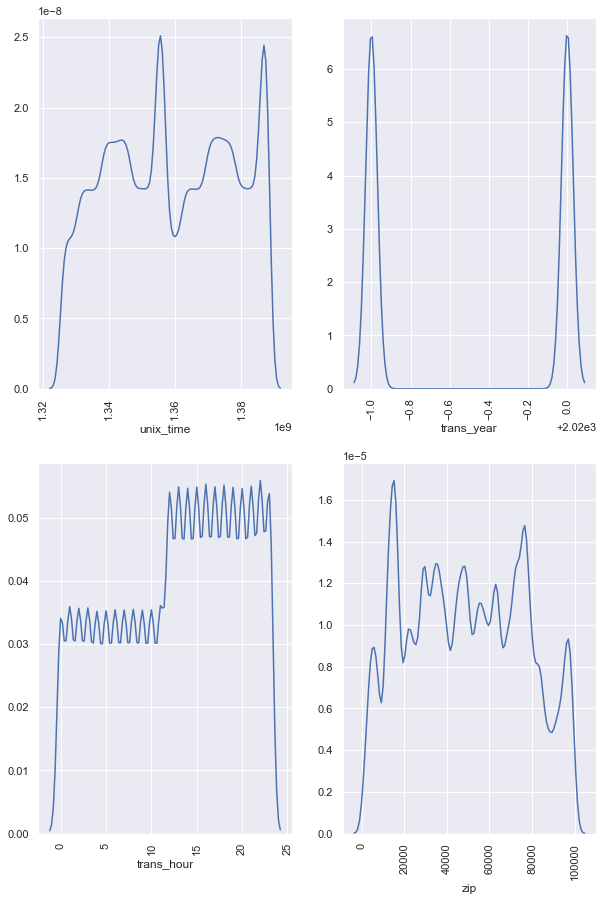

In [73]:
num_col2 = ['unix_time','trans_year','trans_hour','zip']
plt.figure(figsize = (10,15))
i = 1
for col in num_col2:
    plt.subplot(2,2,i)
    sns.distplot(credit_fraud1[col],hist=False)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

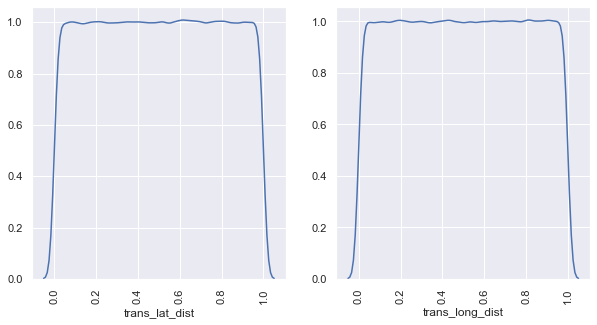

In [71]:
num_col3 = ['trans_lat_dist','trans_long_dist']
plt.figure(figsize = (10,5))
i = 1
for col in num_col3:
    plt.subplot(1,2,i)
    sns.distplot(credit_fraud1[col],hist=False)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

***Analysis:-***
    
- The most of transaction done by credit card is of 1000 and very few transaction of above 10000
- The people of city with a population of 0.2 are doing maximum transaction via credit card.
- The people with a age of 35 and 45 are doing maximum number of transaction.
- The most of the transaction are at between unix time between 1.35-1.36 and at 1.39.
- The majority transaction are happening between 11:00 AM - 12:00 Midnight and the minimum transaction are done between 12:00 AM   -11:00AM.
- This trend shows people do less transaction in the morning and more transaction in afternoon and night.
- The city with the zip code of 17000 has the maximimum number of fraud and non-fraud transaction.
- There are constant number of transaction at a latitude distance between 0.1-1.0
- There are constant number of transaction with a latitude distance between 0.1-1.0

 ##### 7.2.2 Univariate Analysis of Categorical Columns

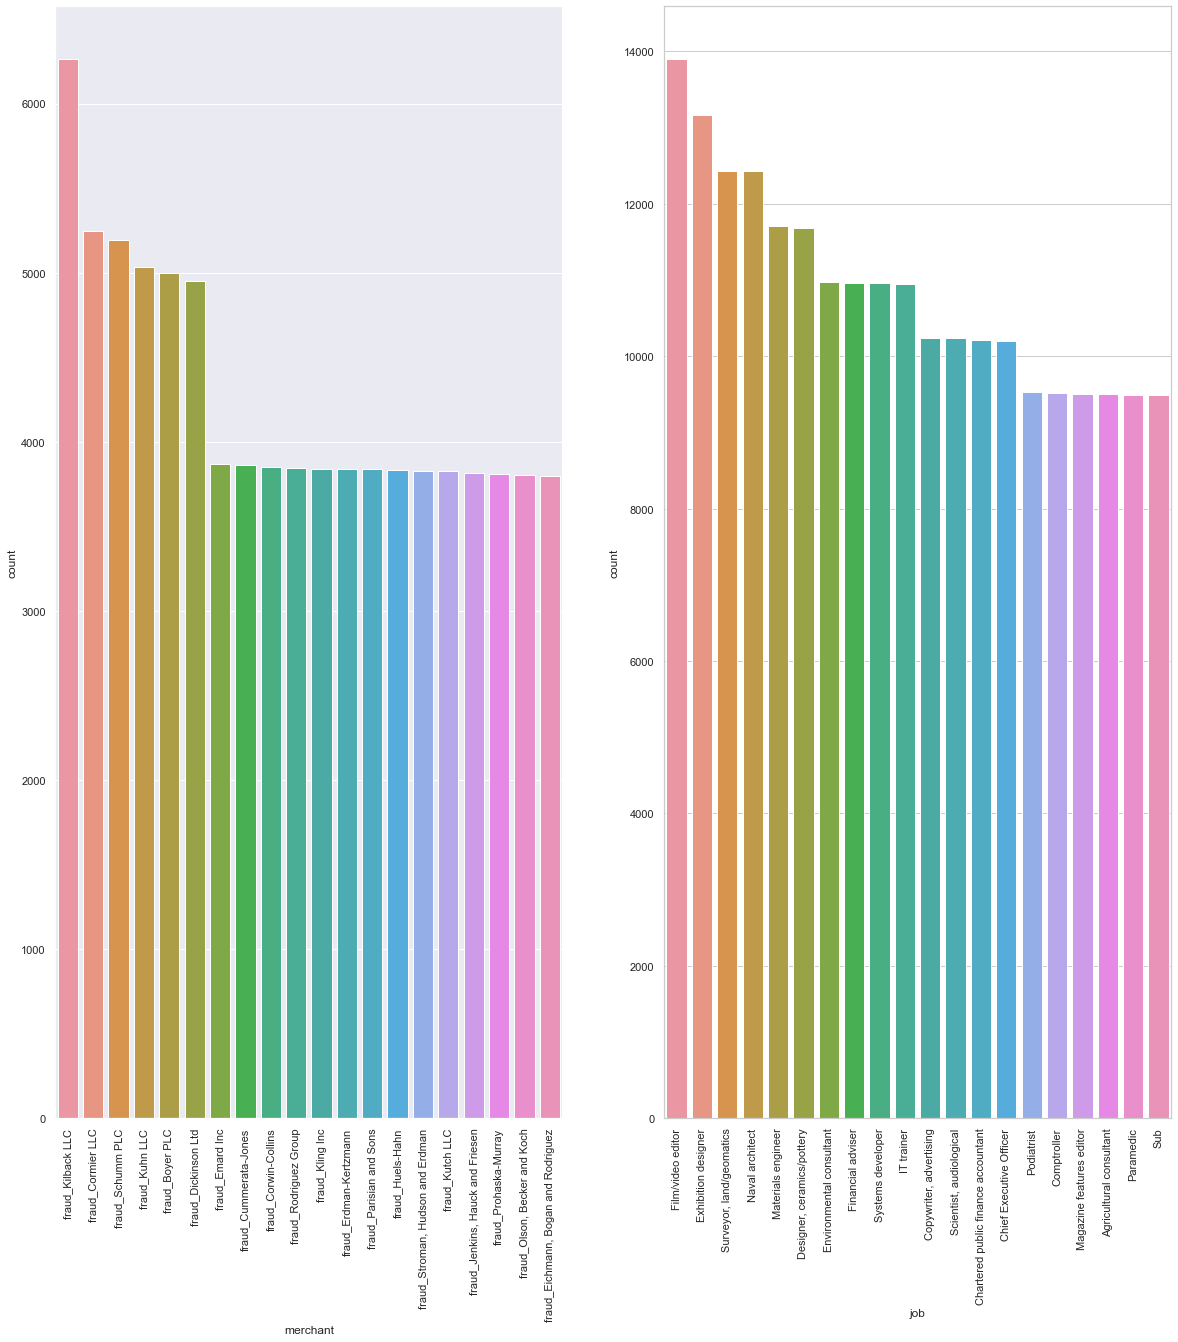

In [74]:
# Plotting box plot for categorical columns
catg_var0 = ['merchant','job'] 
plt.figure(figsize = (20,45))
i = 1
for c in catg_var0:
    plt.subplot(2,2,i)
    sns.set_style("whitegrid")
    sns.countplot((credit_fraud1[c]), order=credit_fraud1[c].value_counts().iloc[:20].index)
    plt.xticks(rotation = 90)
    i += 1
plt.show();

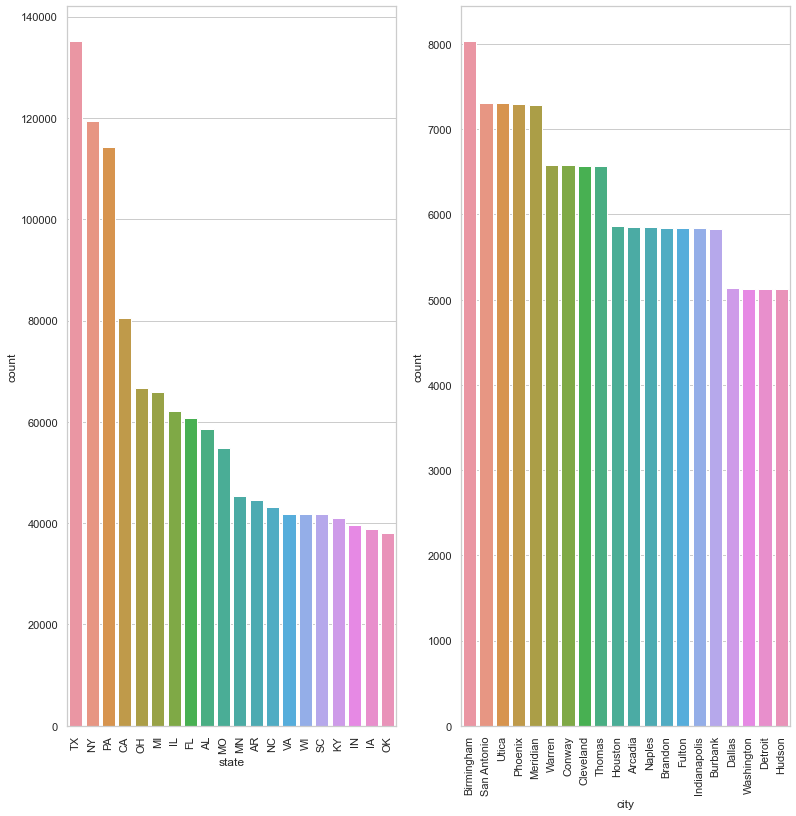

In [75]:
# Plotting box plot for categorical columns
catg_var1 = ['state','city'] 
plt.figure(figsize = (20,45))
i = 1
for c in catg_var1:
    plt.subplot(3,3,i)
    sns.set_style("whitegrid")
    sns.countplot((credit_fraud1[c]), order=credit_fraud1[c].value_counts().iloc[:20].index)
    plt.xticks(rotation = 90)
    i += 1
plt.show();

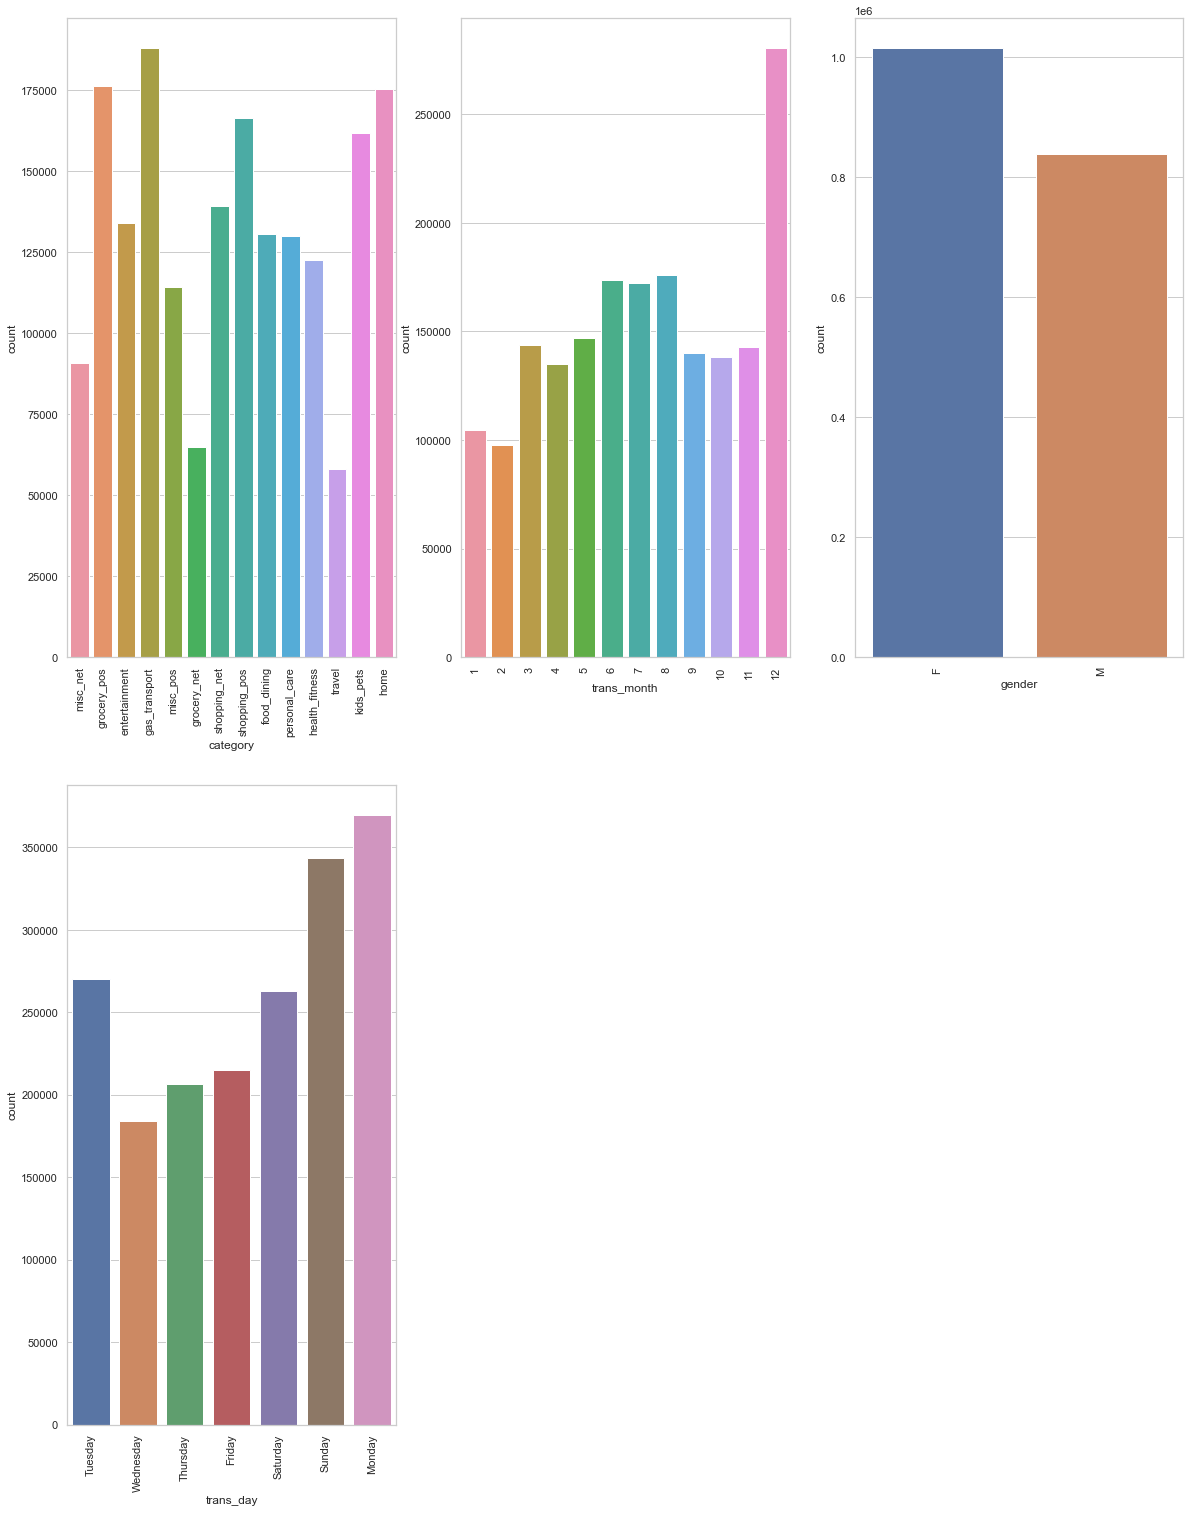

In [76]:
catg_var2 = ['category','trans_month','gender','trans_day']
plt.figure(figsize = (20,40))
i = 1
for c in catg_var2:
    plt.subplot(3,3,i)
    sns.set_style("whitegrid")
    sns.countplot(credit_fraud1[c])
    plt.xticks(rotation = 90)
    i += 1
plt.show();

***Analysis:-***
     
- Gas Transport and Grocery_pos categories are the highest transaction dealing categories.
- The maximum transactions are done on Monday and Sunday.
- The month of December reported the maximum number of transaction.
- The females do more transaction than males through credit card.
- The people living in Birmingham do highest transaction among other cities via credit card.
- The Texas state use credit card for performing transaction.
- The people in Film/Video Editor & Exibition Desinger makes maximum use of transaction via credit card.
- The merchant fraud_Killback_LLC mostly accepts credit for transactions

#### 7.3 Bivariate Analysis

##### 7.3.1 Bivariate Analysis of Numerical Columns

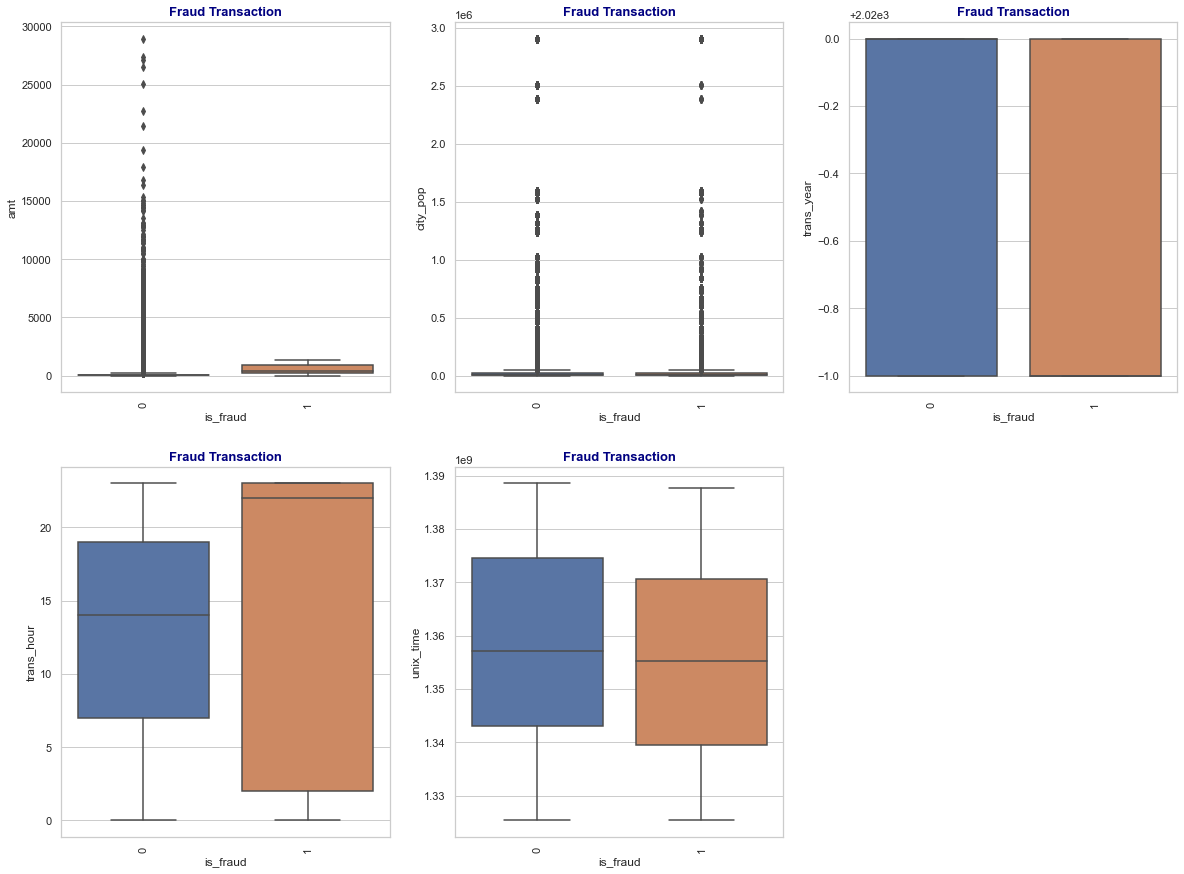

In [77]:
num_col1 = ['amt','city_pop','trans_year','trans_hour','unix_time']
plt.figure(figsize = (20,15))
i = 1
for c in num_col1:
    plt.subplot(2,3,i)
    sns.set_style("whitegrid")
    sns.boxplot(y = credit_fraud1[c], x = "is_fraud", data = credit_fraud1)
    plt.title("Fraud Transaction",fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation = 90)
    i += 1
plt.show();

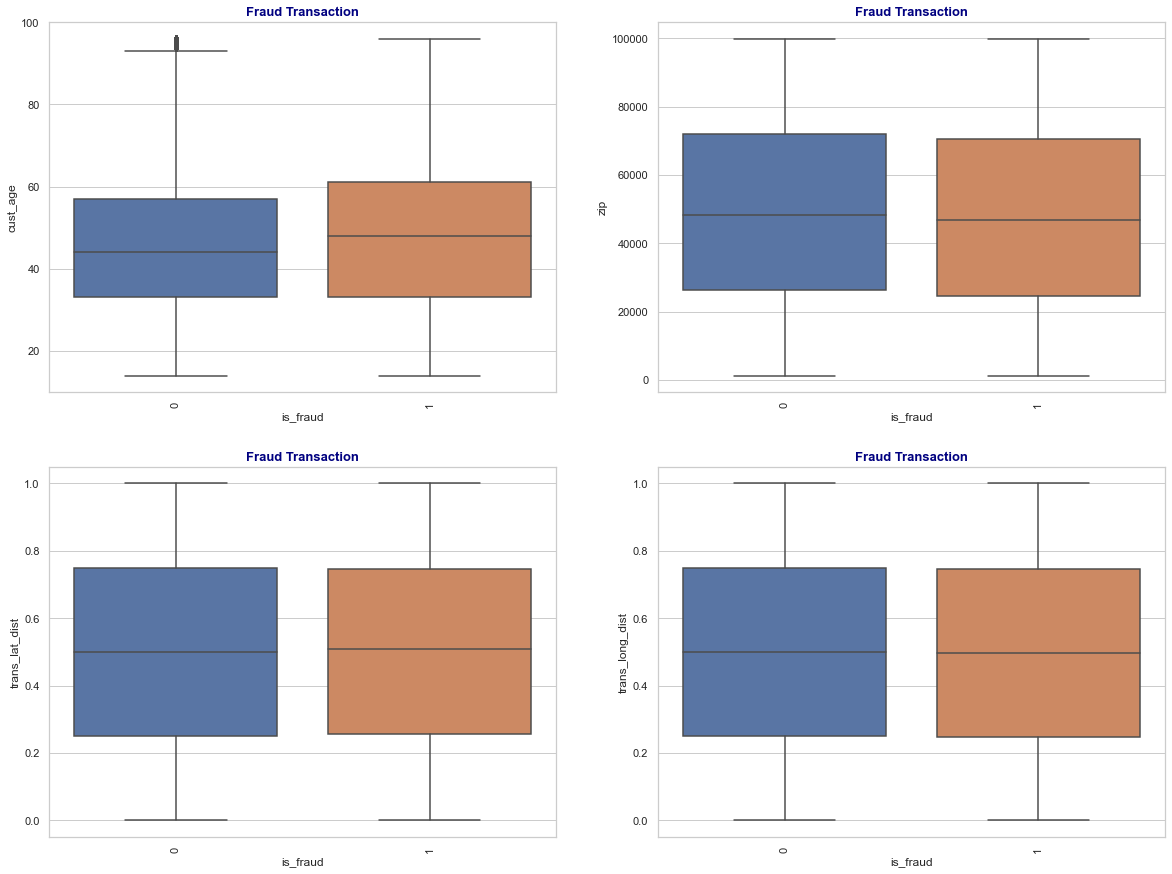

In [78]:
num_col2 = ['cust_age','zip','trans_lat_dist','trans_long_dist']
plt.figure(figsize = (20,15))
i = 1
for c in num_col2:
    plt.subplot(2,2,i)
    sns.set_style("whitegrid")
    sns.boxplot(y = credit_fraud1[c], x = "is_fraud", data = credit_fraud1)
    plt.title("Fraud Transaction",fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation = 90)
    i += 1
plt.show();

***Analysis:-***
    
- The fraud transaction ammount is more than non-fraud transaction.
- The fraud transaction is same in both the year.
- The fraud transaction are more in the early morning and in late night than non-fraud transaction.
- However in the afternoon fraud and non-fraud transaction are same.
- The maximum fraud transaction are reported at unic time 1.34.
- The fraud transaction and non-transaction are constant with respect too the city population
- the zip of the fraud and non-fraud transaction is similar
- The people with a age of between 50-60 have reported maximum fraud transaction.
- The latitude and longitude distance of transaction and merchant are same for both fraud and non-fraud transaction.

##### 7.3.2 Bivariate Analsis of Categorical Columns

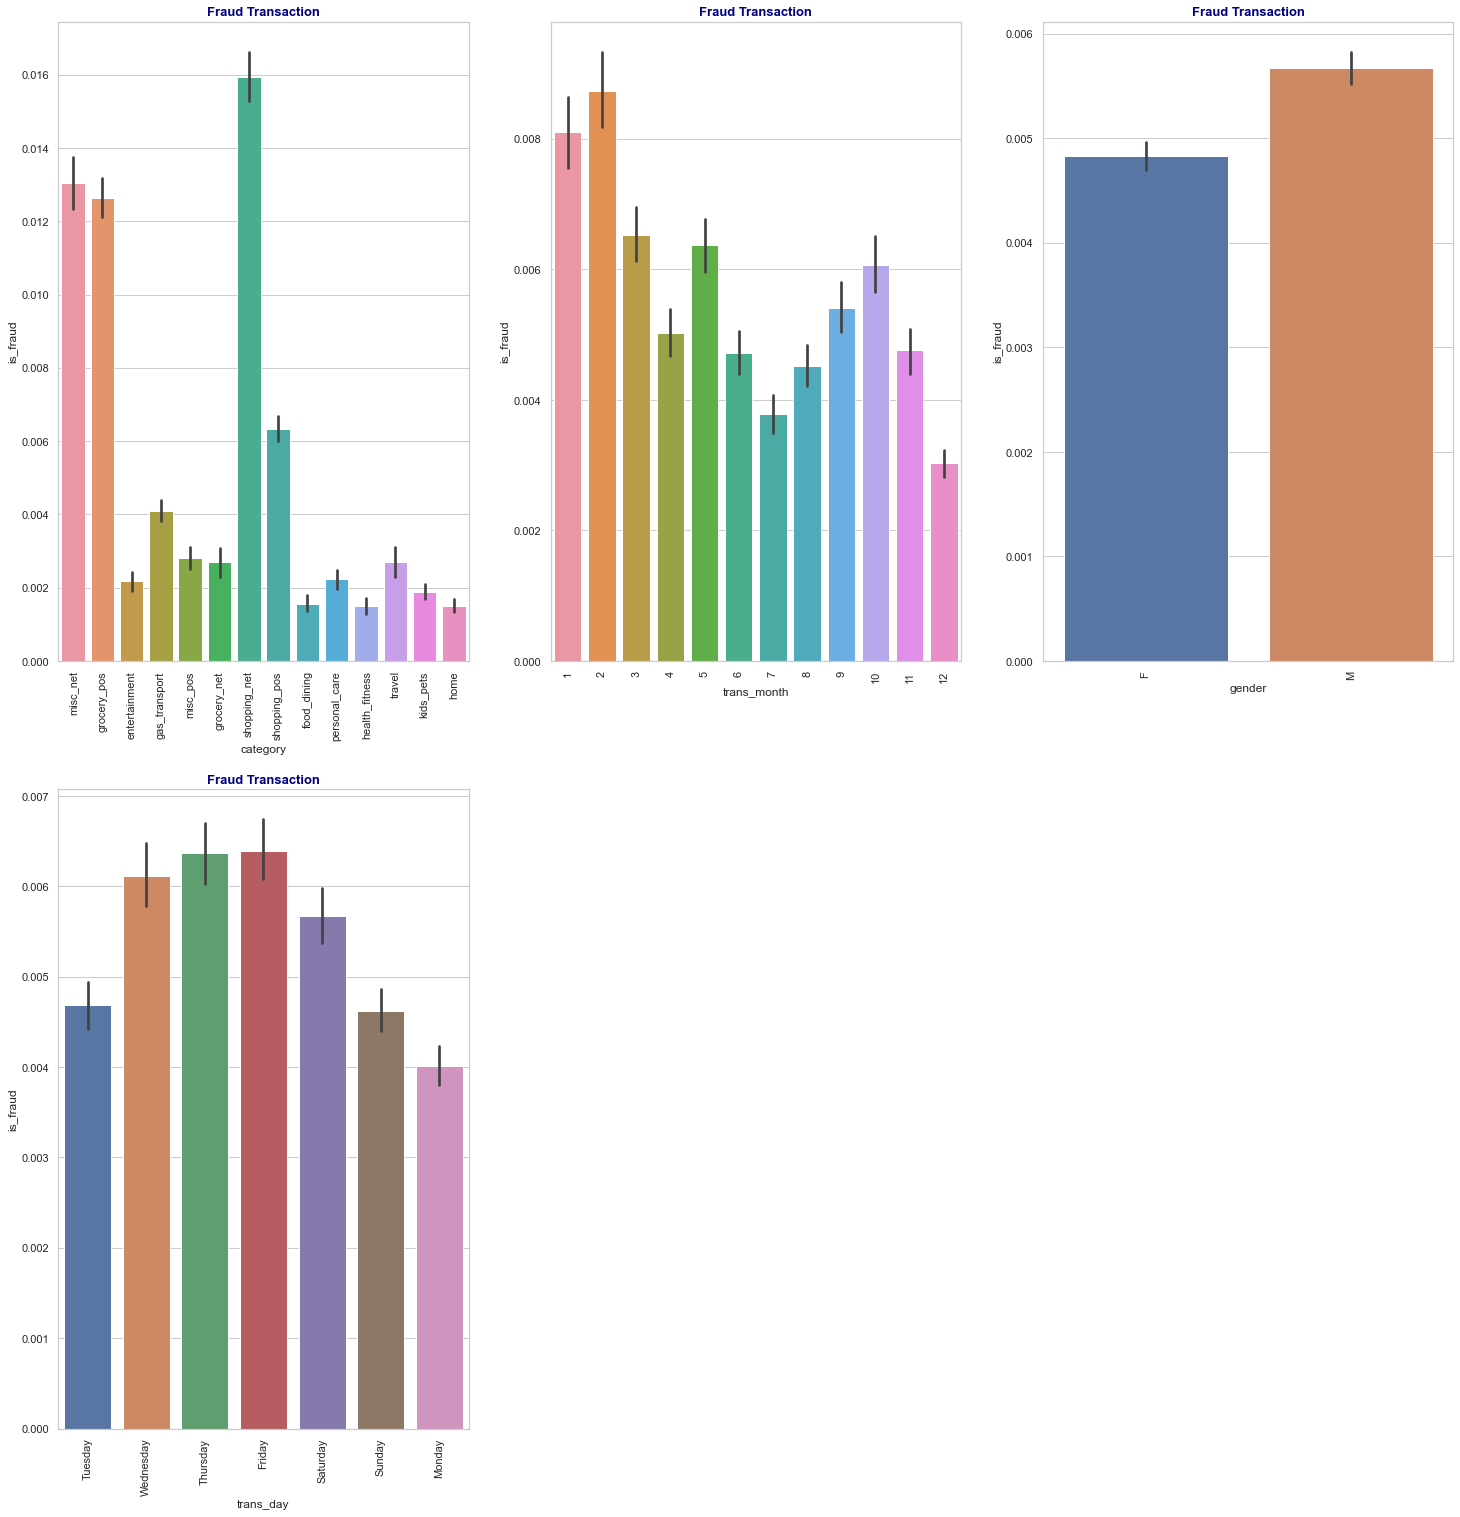

In [79]:

catg_var1 = ['category','trans_month','gender','trans_day']
plt.figure(figsize=(25,40))
for i in enumerate(catg_var1):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=credit_fraud1, x=i[1], y='is_fraud')
    plt.title("Fraud Transaction",fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation=90)
plt.show()

***Analysis:-***
    
- The maximum fraud transaction is done for the category 'shopping_net'
- The month of February has reported the maximum transaction that were fraud.
- The fraud transaction reported for male are more than female.
- The maximum number of fraud transaction are done on Thursday and Friday.


#### 7.4 Distribution of Transaction Ammount By Fraud and Non-Fraud Category

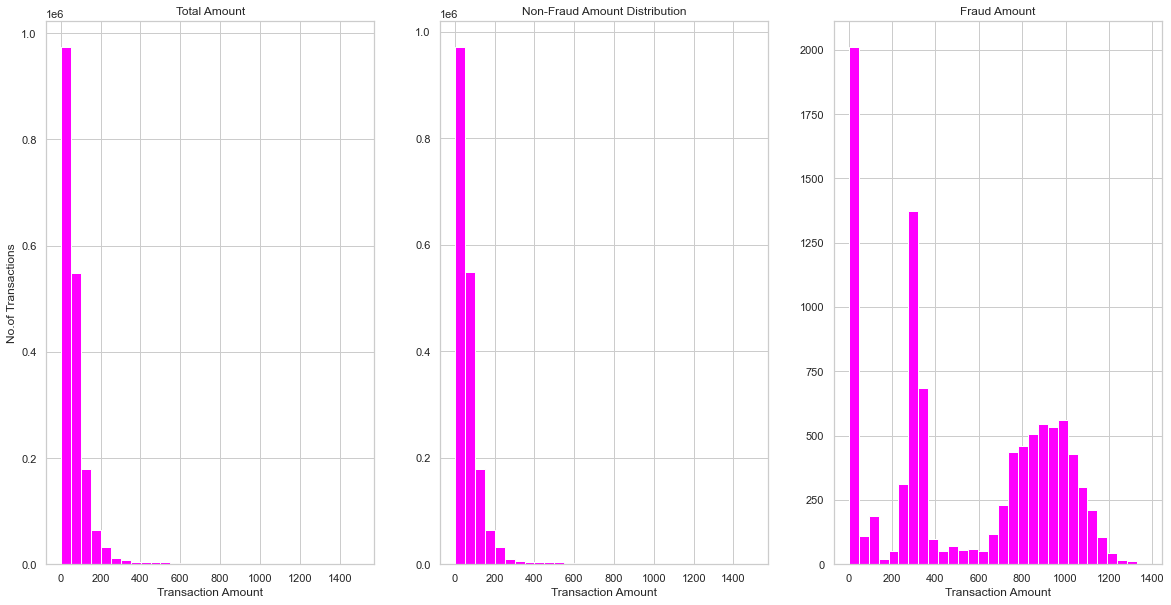

In [80]:
#distribution of transactions amount by different fraudulent  and non-fraudulent categories

fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].hist(credit_fraud1[credit_fraud1['amt']<=1500]['amt'], bins=30,color='magenta')
ax[0].set_title('Total Amount')
ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('No.of Transactions')

ax[1].hist(credit_fraud1[(credit_fraud1['is_fraud']==0) & (credit_fraud1['amt']<=1500)]['amt'], bins=30,color='magenta')
ax[1].set_title('Non-Fraud Amount Distribution')
ax[1].set_xlabel('Transaction Amount')

ax[2].hist(credit_fraud1[(credit_fraud1['is_fraud']==1) & (credit_fraud1['amt']<=1500)]['amt'], bins=30,color='magenta')
ax[2].set_title('Fraud Amount')
ax[2].set_xlabel('Transaction Amount')

plt.show()

***Analysis:-***

- The most people do the transaction of 100 most number of time and tranaction more than 400 very rarely.
- The maximum transaction is of 100 and very rarely above 400.
- The maximum fraud ammount is 2000 

### 8. Dummy Variables

#### 8.1 Creation of Dummy Variables

In [81]:
credit_category = credit_fraud1 [["category"]]
credit_dummy=pd.get_dummies(credit_category,drop_first=True)
credit_dummy.head()

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


#### 8.2 Concatinating the dummy and non-dummy dataset

In [82]:
credit_dummy = pd.concat([credit_fraud1,credit_dummy],axis=1)
credit_dummy.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_time,trans_day,trans_month,trans_year,trans_hour,cust_age,trans_lat_dist,trans_long_dist,cust_age_group,amt_range,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18,Tuesday,1,2019,0,31,0.06800,0.87000,30-40,20000-25000,0,0,0,0,0,0,0,1,0,0,0,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44,Tuesday,1,2019,0,41,0.27100,0.02400,40-50,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51,Tuesday,1,2019,0,57,0.97000,0.10800,50 above,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,2019-01-01,00:01:16,Tuesday,1,2019,0,52,0.80400,0.44700,50 above,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2019-01-01,00:03:06,Tuesday,1,2019,0,33,0.25400,0.83000,30-40,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0


#### 8.3 Checking Shape of Dummy Dataset

In [83]:
credit_dummy.shape

(1852394, 41)

In [84]:
credit_dummy.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_time,trans_day,trans_month,trans_year,trans_hour,cust_age,trans_lat_dist,trans_long_dist,cust_age_group,amt_range,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18,Tuesday,1,2019,0,31,0.06800,0.87000,30-40,20000-25000,0,0,0,0,0,0,0,1,0,0,0,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44,Tuesday,1,2019,0,41,0.27100,0.02400,40-50,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51,Tuesday,1,2019,0,57,0.97000,0.10800,50 above,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,2019-01-01,00:01:16,Tuesday,1,2019,0,52,0.80400,0.44700,50 above,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2019-01-01,00:03:06,Tuesday,1,2019,0,33,0.25400,0.83000,30-40,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0


In [85]:
#Binary mapping on Gender
  
credit_dummy['gender'] = credit_dummy['gender'].map({'M': 1, 'F': 0})
credit_dummy.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_time,trans_day,trans_month,trans_year,trans_hour,cust_age,trans_lat_dist,trans_long_dist,cust_age_group,amt_range,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97000,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18,Tuesday,1,2019,0,31,0.06800,0.87000,30-40,20000-25000,0,0,0,0,0,0,0,1,0,0,0,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23000,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44,Tuesday,1,2019,0,41,0.27100,0.02400,40-50,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11000,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51,Tuesday,1,2019,0,57,0.97000,0.10800,50 above,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00000,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,2019-01-01,00:01:16,Tuesday,1,2019,0,52,0.80400,0.44700,50 above,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96000,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2019-01-01,00:03:06,Tuesday,1,2019,0,33,0.25400,0.83000,30-40,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0


In [86]:
credit_fraud_final = credit_dummy.copy()

#### 8.4 Dropping the unecessary column from the Dummy Dataset

In [87]:
credit_fraud_final.drop(['city','job','dob','trans_date',
                        'cc_num','merchant','first','last','street','zip','trans_num','unix_time','trans_hour','trans_day',
                          'cust_age_group','amt_range','trans_time','trans_year','state','category'],
                        axis=1,inplace=True)

#### 8.5 Create a Final Datasest

In [88]:
credit_fraud_final.head()

,amt,gender,city_pop,is_fraud,trans_month,cust_age,trans_lat_dist,trans_long_dist,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97000,0,3495,0,1,31,0.06800,0.87000,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23000,0,149,0,1,41,0.27100,0.02400,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11000,1,4154,0,1,57,0.97000,0.10800,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00000,1,1939,0,1,52,0.80400,0.44700,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96000,1,99,0,1,33,0.25400,0.83000,0,0,0,0,0,0,0,0,1,0,0,0,0


In [89]:
credit_fraud_final.shape

(1852394, 21)

### 9. Check the distribution of data

<Figure size 432x288 with 0 Axes>

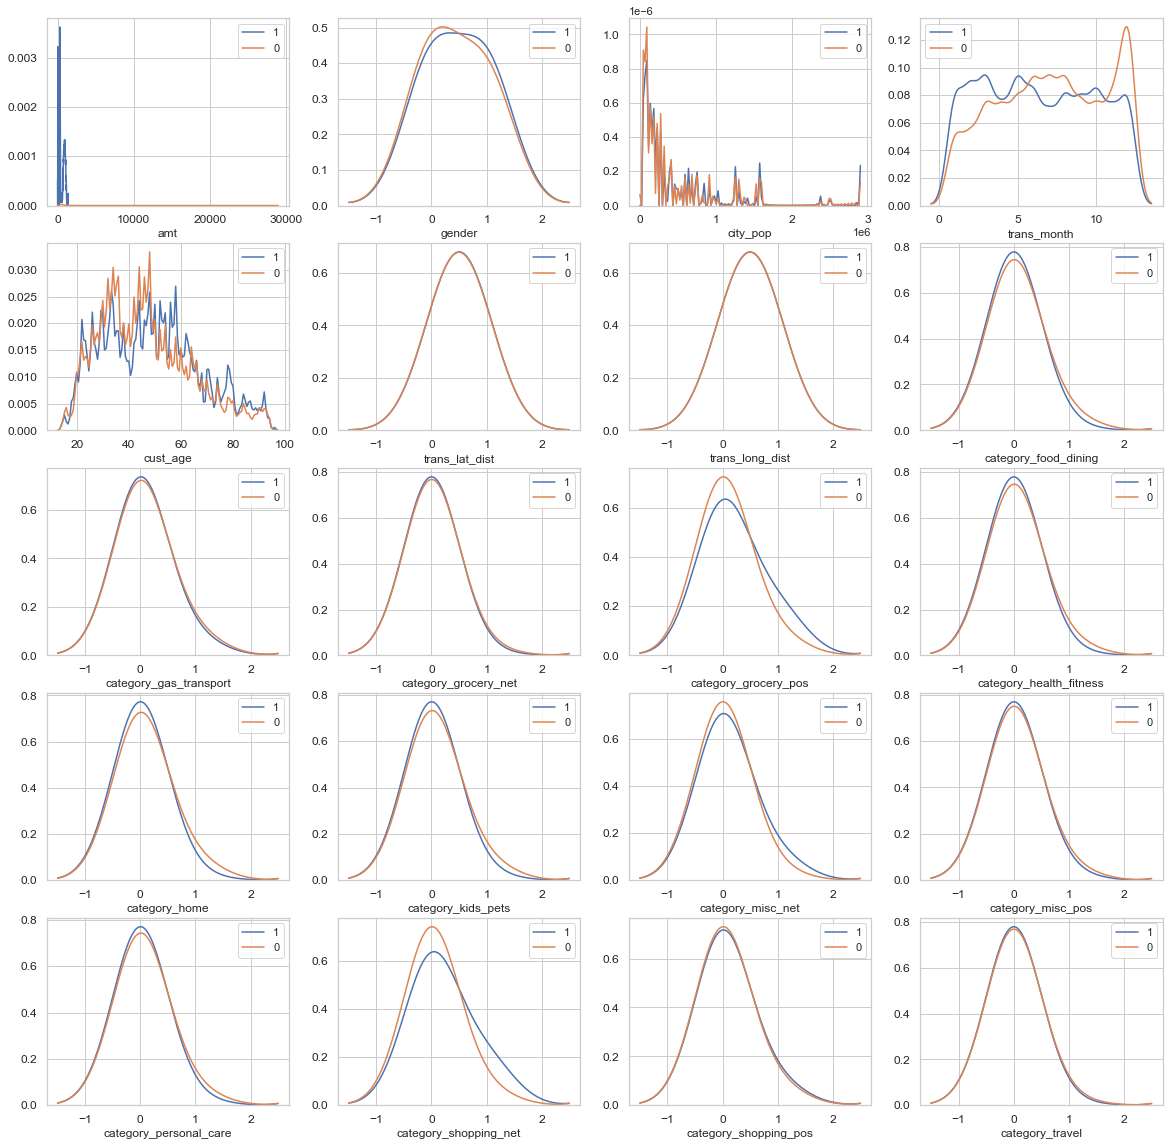

In [90]:
var = list(credit_fraud_final.columns.values)
# dropping Class columns from the list
var.remove("is_fraud")

i = 0
fraud_target = credit_fraud_final.loc[credit_fraud_final['is_fraud'] == 1]
nonfraud_target = credit_fraud_final.loc[credit_fraud_final['is_fraud'] == 0]

plt.figure()
fig, ax = plt.subplots(5,4,figsize=(20,20))

for feature in var:
    i += 1
    plt.subplot(5,4,i)
    sns.kdeplot(fraud_target[feature], bw=0.5,label="1")
    sns.kdeplot(nonfraud_target[feature], bw=0.5,label="0")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [91]:
credit_fraud_final.head()

,amt,gender,city_pop,is_fraud,trans_month,cust_age,trans_lat_dist,trans_long_dist,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97000,0,3495,0,1,31,0.06800,0.87000,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23000,0,149,0,1,41,0.27100,0.02400,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11000,1,4154,0,1,57,0.97000,0.10800,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00000,1,1939,0,1,52,0.80400,0.44700,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96000,1,99,0,1,33,0.25400,0.83000,0,0,0,0,0,0,0,0,1,0,0,0,0


### 10. Balancing the Data

#### 10.1 Check the Data Imbalance Before Oversampling

In [92]:
# Check the imbalance of the data

nfraud_count = credit_fraud_final[credit_fraud_final['is_fraud'] == 0]['amt'].count()
fraud_target = credit_fraud_final[credit_fraud_final['is_fraud'] == 1]
nonfraud_target = credit_fraud_final[credit_fraud_final['is_fraud'] == 0]
credit_fraud_final['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

***Analysis:-***

- We can infer from above that there is huge imbalance in the data

#### 10.2 Performing Oversampling to Balance the Data

In [93]:
#OverSampling
oversampled_frd = fraud_target.sample(nfraud_count, replace=True)
oversampled = pd.concat([nonfraud_target, oversampled_frd], axis=0)

#### 10.3 Check the Data After Oversampling

In [94]:
oversampled['is_fraud'].value_counts()

1    1842743
0    1842743
Name: is_fraud, dtype: int64

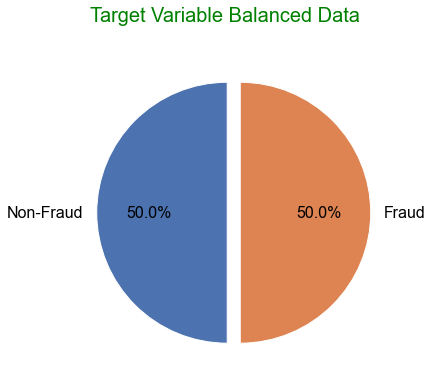

In [95]:
# Plot Imbalance in a Pie Chart
lables = 'Non-Fraud','Fraud'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(oversampled['is_fraud'].value_counts(), explode=explode, labels=lables, autopct='%.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Target Variable Balanced Data \n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

***Analysis:-***
    
- The data is balanced after performing Oversampling

#### 10.4 Balanced Data

In [96]:
oversampled.head()

,amt,gender,city_pop,is_fraud,trans_month,cust_age,trans_lat_dist,trans_long_dist,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97000,0,3495,0,1,31,0.06800,0.87000,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23000,0,149,0,1,41,0.27100,0.02400,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11000,1,4154,0,1,57,0.97000,0.10800,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00000,1,1939,0,1,52,0.80400,0.44700,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96000,1,99,0,1,33,0.25400,0.83000,0,0,0,0,0,0,0,0,1,0,0,0,0


### 11. Perform the Train Test Split

#### 11.1 Splitting train and test dataset into X and y

In [97]:
X = oversampled.drop(['is_fraud'],axis=1)
X.head()

,amt,gender,city_pop,trans_month,cust_age,trans_lat_dist,trans_long_dist,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97000,0,3495,1,31,0.06800,0.87000,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23000,0,149,1,41,0.27100,0.02400,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11000,1,4154,1,57,0.97000,0.10800,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00000,1,1939,1,52,0.80400,0.44700,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96000,1,99,1,33,0.25400,0.83000,0,0,0,0,0,0,0,0,1,0,0,0,0


In [98]:
y = oversampled['is_fraud']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

#### 11.2 Creating Train and Test Data

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

#### 11.3 Train Data

In [100]:
X_train.head()

,amt,gender,city_pop,trans_month,cust_age,trans_lat_dist,trans_long_dist,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
602524,85.90000,0,5438,9,55,0.76300,0.08700,0,0,0,0,0,0,0,0,1,0,0,0,0
1288474,331.00000,1,1988,6,42,0.32600,0.84000,0,0,0,1,0,0,0,0,0,0,0,0,0
1024284,62.48000,0,328,2,37,0.57800,0.77000,0,0,0,0,0,0,1,0,0,0,0,0,0
88685,304.75000,1,27020,2,33,0.64600,0.63800,0,0,0,1,0,0,0,0,0,0,0,0,0
268443,4.76000,0,207,5,57,0.64700,0.90400,0,0,0,0,0,0,0,1,0,0,0,0,0


#### 11.4 Test Data

In [101]:
X_test.head()

,amt,gender,city_pop,trans_month,cust_age,trans_lat_dist,trans_long_dist,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
101578,1049.73000,0,3508,7,74,0.12400,0.08400,0,0,0,0,0,0,0,0,0,0,1,0,0
453937,988.31000,1,54767,12,33,0.10900,0.55000,0,0,0,0,0,0,0,0,0,0,1,0,0
142661,876.32000,0,1766,8,45,0.44300,0.14900,0,0,0,0,0,0,0,1,0,0,0,0,0
658698,33.71000,0,34153,10,24,0.00900,0.25200,0,0,0,0,0,0,1,0,0,0,0,0,0
1152737,270.54000,0,20133,4,84,0.66600,0.86600,0,0,0,1,0,0,0,0,0,0,0,0,0


#### 11.5 Checking the Shape of Train and Test Data

In [102]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2579840, 20)
X_test (1105646, 20)
y_train (2579840,)
y_test (1105646,)


### 12. Check the skewnees in the dataset

#### 12.1 Plot the histogram of a variable from the dataset to see the skewness

In [103]:
cols = X_train.columns

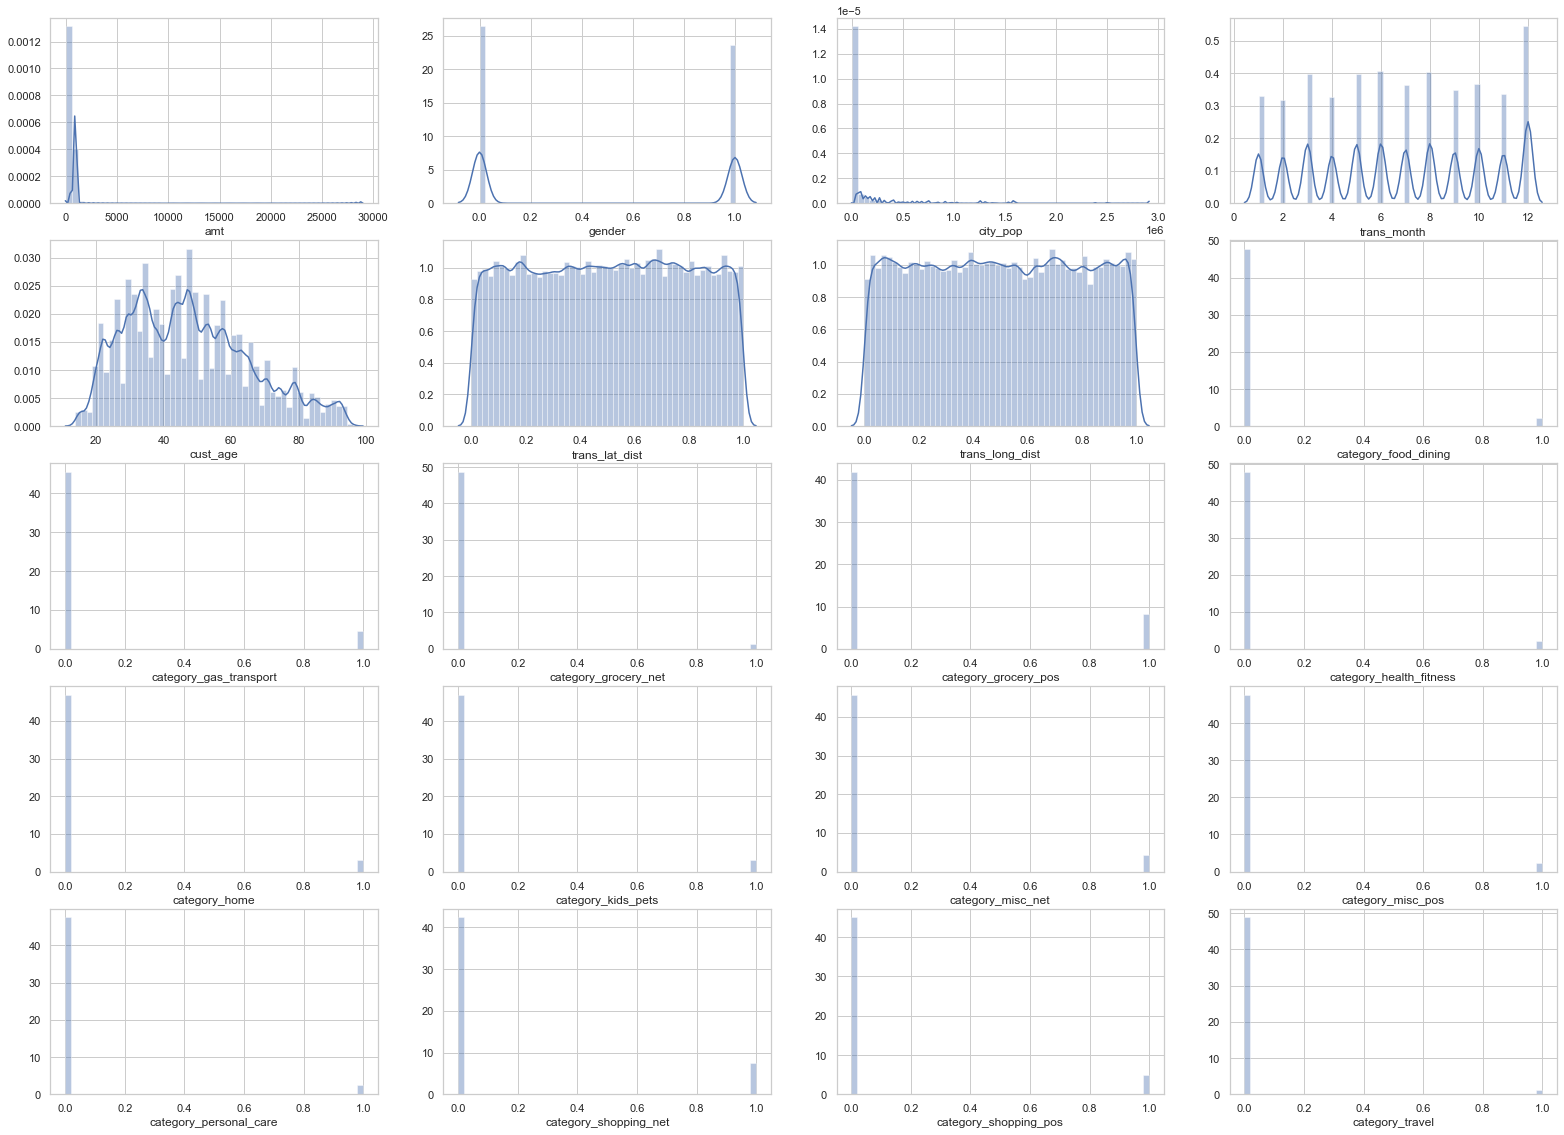

In [104]:
# plot the histogram of a variable from the dataset to see the skewness

plt.figure(figsize=(27,28))
i=0
for col in cols:
    i += 1
    plt.subplot(7,4, i)
    sns.distplot(X_train[col])
plt.show()

***Analysis:-***

- We see that the data is not evenly distributed as there is skewness in the data that will not give good result during model building.


#### 12.2 Fixing the skewness in the dateset

In [105]:
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[col] = pt.fit_transform(X_train)

# Transform the test set
X_test[col] = pt.transform(X_test)

#### 12.3 Plotting the distribution of the variables (skewness) of all the columns after skewnes tratement

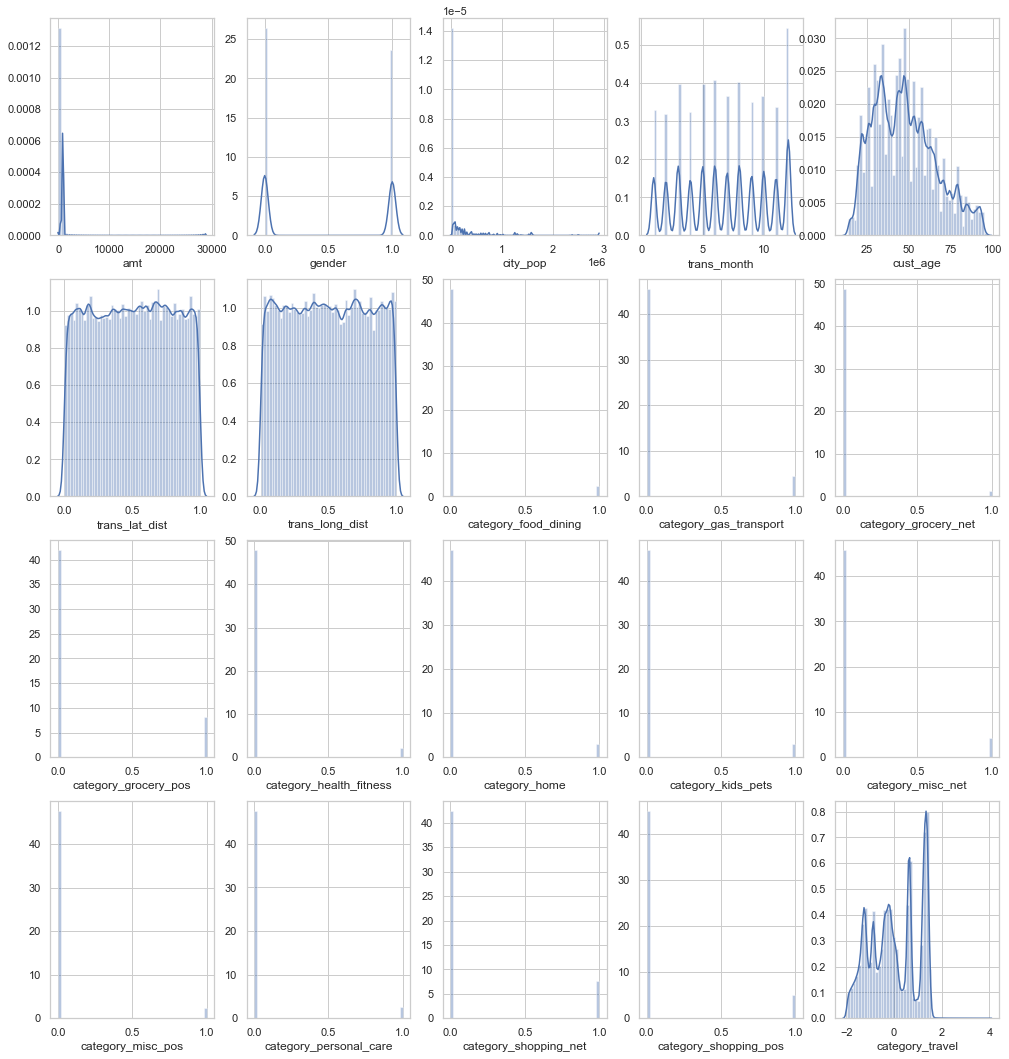

In [106]:
# Plotting the distribution of the variables (skewness) of all the columns

k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])

***Analysis:-***

- After doing the skewed data we can see the data is evenly distributed and this help is building a better model

#### 12.4 Skewed Data

In [107]:
X_train.head()

,amt,gender,city_pop,trans_month,cust_age,trans_lat_dist,trans_long_dist,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
602524,85.90000,0,5438,9,55,0.76300,0.08700,0,0,0,0,0,0,0,0,1,0,0,0,-0.10693
1288474,331.00000,1,1988,6,42,0.32600,0.84000,0,0,0,1,0,0,0,0,0,0,0,0,0.68304
1024284,62.48000,0,328,2,37,0.57800,0.77000,0,0,0,0,0,0,1,0,0,0,0,0,-0.28147
88685,304.75000,1,27020,2,33,0.64600,0.63800,0,0,0,1,0,0,0,0,0,0,0,0,0.63232
268443,4.76000,0,207,5,57,0.64700,0.90400,0,0,0,0,0,0,0,1,0,0,0,0,-1.49501


#### 12.5 Checking the shape of skewed dataset

In [108]:
print(X_train[cols].shape)

(2579840, 20)


In [109]:
print(X_test[col].shape)

(1105646,)


### 13. Feature Scaling using Standard Scaler

In [110]:
# Create list of numeric variables
scaled_vars = X_train.columns

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[scaled_vars] = scaler.fit_transform(X_train[scaled_vars])
X_test[scaled_vars] = scaler.transform(X_test[scaled_vars])

### 14. Model Building

### 14.1 Logistice Regerssion

##### 14.1.1 Building Logistice Regression using RFE

In [111]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train[cols], y_train)

LogisticRegression(random_state=42)

In [112]:
y_train_pred_lr = logreg.predict(X_train)
y_test_pred_lr = logreg.predict(X_test)

In [113]:
rfe = RFE(logreg,step = 20)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(random_state=42), step=20)

In [114]:
#5.4. Build a Model using Manual elimination

#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    
# Add a constant
    X_train_sm = sm.add_constant(X_train[cols]) 

# Create a first fitted model
    logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm1.fit()
    print(res.summary())

In [115]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [116]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['amt', 'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_kids_pets', 'category_misc_net',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [117]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[~rfe.support_]

Index(['gender', 'city_pop', 'trans_month', 'cust_age', 'trans_lat_dist',
       'trans_long_dist', 'category_food_dining', 'category_health_fitness',
       'category_home', 'category_misc_pos'],
      dtype='object')

In [118]:
# Taking 15 columns supported by RFE for regression
X_train_RFE = X_train[['amt', 'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_kids_pets', 'category_misc_net',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel']]

##### 14.1.2 Building the Model

In [119]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['amt', 'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_kids_pets', 'category_misc_net',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel']
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_fraud   No. Observations:              2579840
Model:                            GLM   Df Residuals:                  2579829
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 09 Mar 2022   Deviance:                          inf
Time:                        16:44:16   Pearson chi2:                 1.15e+18
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

***Analysis:-***
    
- All the p-values are now in the appropriate range

#### 14.1.3 Fitting the Model

In [120]:
# Cross Validation
scores = cross_validate(logreg, X_train[scaled_vars], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
print(f"Cross validated mean accuracy: {round(scores['test_accuracy'].mean(), 3)}")

logreg.fit(X_train[scaled_vars], y_train)
pred = logreg.predict(X_train[scaled_vars])
prob_est = logreg.predict_proba(X_train[scaled_vars])

Cross validated mean accuracy: 0.852


##### 14.1.4 Measuring Model Performance

Sensitivity (Recall): 0.7674556506559966
Specificity: 0.9477624207011945
Precision: 0.9362882589132889
F-Score: 0.8435067158978413


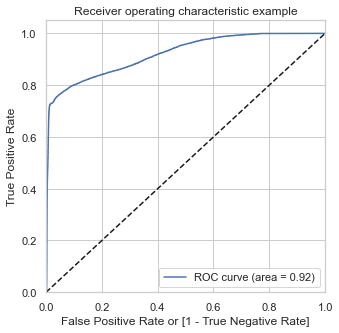

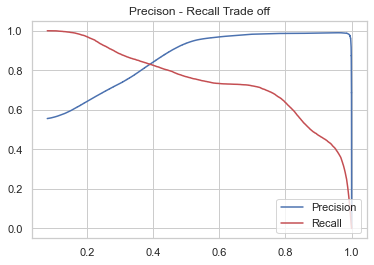

In [121]:
def draw_roc(actual_values, probability_estimates):
    fpr, tpr, thresholds = roc_curve(actual_values, probability_estimates, drop_intermediate=False)
    auc_score = roc_auc_score(actual_values, probability_estimates)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {round(auc_score, 2)})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def draw_prec_recall(actual_values, probability_estimates):
    
    p, r, thresholds = precision_recall_curve(actual_values, probability_estimates)
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "r-", label="Recall")
    plt.title("Precison - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()

def get_metrics(y, pred, prob_est):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    f = f1_score(y, pred)

    # Sensitivity, Specificity
    print(f"Sensitivity (Recall): {recall}\nSpecificity: {tn/(tn+fp)}\nPrecision: {precision}\nF-Score: {f}")

    # Reciever Operating Characteristic Curve
    draw_roc(y, prob_est[:, 1])

    # Precision Recall Curve
    draw_prec_recall(y, prob_est[:, 1])
    
get_metrics(y_train, pred, prob_est)

##### 14.1.5 Finding Optimal Cutoff

In [122]:
# Making y_train_pred_final
y_train_pred_final = pd.DataFrame({'is_fraud':y_train, 'probability': prob_est[:, 1]})
numbers = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

# Making cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.is_fraud, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensi, cutoff_df.speci], axis=0)

#### 14.1.6 Plotting accuracy sensitivity and specificity for various probabilities

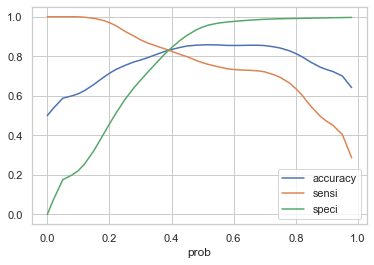

Optimum cut-off value is: 0.4


In [123]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

cutoff_value = cutoff_df.sort_values('var').head(1)['prob'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")

##### 14.1.7 Evaluating the Model on train dataset

Accuracy: 0.8344513613247333
Sensitivity (Recall): 0.8254869009951182
Specificity: 0.8434182960623132
Precision: 0.8405962859210883
F-Score: 0.8329730814190185


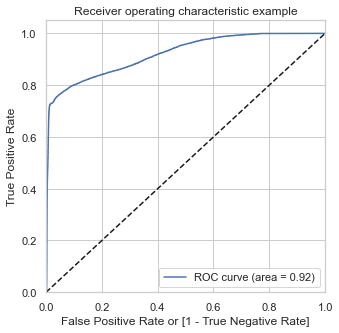

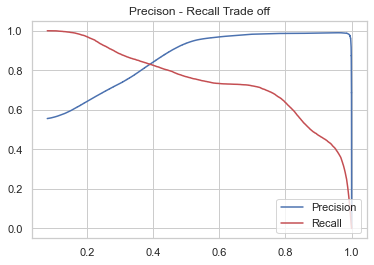

In [124]:
# new predicted values based on cut-off
pred = (logreg.predict_proba( X_train[scaled_vars])[:, 1] >= cutoff_value).astype(int)
print(f"Accuracy: {accuracy_score(y_train, pred)}")
get_metrics(y_train, pred, prob_est)

##### 14.1.8 Evaluating the Model on test dataset

accuracy:0.8083500505586779
Sensitivity (Recall): 0.8056238634204598
Specificity: 0.8110744826862881
Precision: 0.8099399672548663
F-Score: 0.8077761499349114


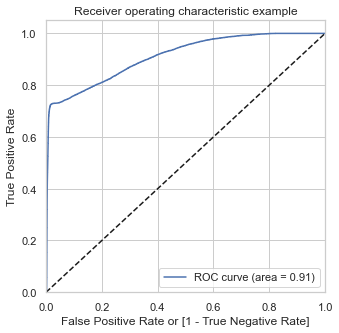

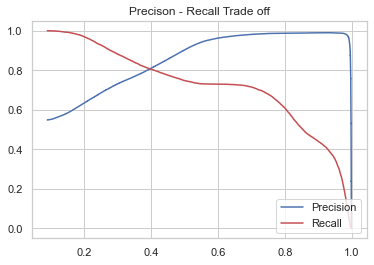

In [125]:
# Scoring against Test Set
logreg.fit(X_test[scaled_vars], y_test)
pred = (logreg.predict_proba( X_test[scaled_vars])[:, 1] >= cutoff_value).astype(int)
prob_est = logreg.predict_proba(X_test[scaled_vars])
print(f"accuracy:{accuracy_score(y_test, pred)}")
get_metrics(y_test, pred, prob_est)

#### 14.2 Decission Tree

#### 14.2.1 Building the Model using Decission Tree

In [126]:
dt = DecisionTreeClassifier(random_state=42)

In [127]:
hyper_params = [{ 'max_depth' : [2, 3, 5, 10, 20],
                  'min_samples_leaf' : [5, 10, 20, 50, 100],
                'criterion' : [ 'entropy' , 'gini' ]}]

In [128]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=hyper_params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [129]:
X_train_dt = X_train.copy()
y_train_dt = y_train.copy()

In [130]:
X_test_dt = X_test.copy()
y_test_dt = y_test.copy()

In [131]:
y_train_pred_dt = logreg.predict(X_train_dt)
y_test_pred_dt = logreg.predict(X_test_dt)

In [132]:
%%time
grid_search.fit(X_train_dt, y_train_dt)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 24min 43s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 5, 10, 20],
                          'min_samples_leaf': [5, 10, 20, 50, 100]}],
             scoring='accuracy', verbose=1)

In [133]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,18.14963,1.10335,0.40991,0.11877,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.86106,0.86148,0.86168,0.86049,0.86118,0.00046,46
1,19.31907,1.73647,0.33560,0.05960,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.86106,0.86148,0.86168,0.86049,0.86118,0.00046,46
2,12.84437,0.46312,0.37524,0.07777,entropy,2,20,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.86106,0.86148,0.86168,0.86049,0.86118,0.00046,46
3,13.40720,0.11472,0.36160,0.07384,entropy,2,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.86106,0.86148,0.86168,0.86049,0.86118,0.00046,46
4,11.43741,0.37301,0.31138,0.04086,entropy,2,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.86106,0.86148,0.86168,0.86049,0.86118,0.00046,46


In [134]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
45,58.18678,0.91867,0.42203,0.03066,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.98789,0.98804,0.98851,0.98795,0.98810,0.00024,1
46,51.72966,0.34879,0.40265,0.04361,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.98793,0.98788,0.98847,0.98778,0.98801,0.00027,2
47,54.76069,0.40545,0.39340,0.04166,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.98742,0.98757,0.98790,0.98757,0.98762,0.00018,3
20,41.30213,0.46013,0.37116,0.03300,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.98720,0.98727,0.98708,0.98641,0.98699,0.00034,4
21,40.60661,0.18699,0.38259,0.05258,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.98679,0.98702,0.98686,0.98616,0.98671,0.00032,5


In [135]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [136]:
dt_best = grid_search.best_estimator_

##### 14.2.2 Evaluating the Model on train dataset

In [137]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_dt, dt_classifier.predict(X_train_dt)))
    print("Train Precision :", precision_score(y_train_dt, dt_classifier.predict(X_train_dt)))
    print("Train Recall :", recall_score(y_train_dt, dt_classifier.predict(X_train_dt)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_dt, dt_classifier.predict(X_train)))
    print("-"*50)
evaluate_model(dt_best)


Train Accuracy : 0.9887264326469859
Train Precision : 0.9815338956385199
Train Recall : 0.9961979632555046
Train Confusion Matrix:
[[1265563   24179]
 [   4905 1285193]]
--------------------------------------------------


##### 14.2.3 Evaluating the Model on test dataset

In [138]:
def evaluate_model(dt_classifier):
    print("Test Accuracy :", accuracy_score(y_test_dt, dt_classifier.predict(X_test_dt)))
    print("Test Precision :", precision_score(y_test_dt, dt_classifier.predict(X_test_dt)))
    print("Test Recall :", recall_score(y_test_dt, dt_classifier.predict(X_test_dt)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_dt, dt_classifier.predict(X_test)))
    print("-"*50)
evaluate_model(dt_best)

Test Accuracy : 0.988561438290375
Test Precision : 0.981173568859757
Test Recall : 0.9962308534411783
Test Confusion Matrix:
[[542437  10564]
 [  2083 550562]]
--------------------------------------------------


#### 14.3 Random Forest

##### 14.3.1 Building Model using Random Forest

In [139]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,max_features=5,random_state=42,oob_score=True)

In [140]:
X_train_rf = X_train.copy()
y_train_rf = y_train.copy()

In [141]:
X_test_rf = X_test.copy()
y_test_rf = y_test_dt.copy()

In [142]:
y_train_pred_rf = logreg.predict(X_train_rf)
y_test_pred_rf = logreg.predict(X_test_rf)

In [143]:
%%time
rf.fit(X_train_rf,y_train_rf)

Wall time: 47.6 s


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [144]:
rf.oob_score_

0.894094982634582

In [145]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=4, max_features=5, random_state=1608637542)

##### 14.3.2 Evaluating the Model on train dataset

In [146]:
def evaluate_model(rf_classifier):
    print("Train Accuracy :", accuracy_score(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("Train Precision :", precision_score(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("Train Recall :", recall_score(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("-"*50)
evaluate_model(rf)

Train Accuracy : 0.9022470385760357
Train Precision : 0.9683768852883653
Train Recall : 0.8316802289438476
Train Confusion Matrix:
[[1254704   35038]
 [ 217149 1072949]]
--------------------------------------------------


##### 14.3.3 Evaluating the Model on test dataset

In [147]:
def evaluate_model(rf_classifier):
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_rf, rf_classifier.predict(X_test_rf)))
    print("Test Precision :", precision_score(y_test_rf, rf_classifier.predict(X_test_rf)))
    print("Test Recall :", recall_score(y_test_rf, rf_classifier.predict(X_test_rf)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_rf, rf_classifier.predict(X_test)))
evaluate_model(rf)

--------------------------------------------------
Test Accuracy : 0.9022553330812937
Test Precision : 0.9686435317928824
Test Recall : 0.8313600955405369
Test Confusion Matrix:
[[538128  14873]
 [ 93198 459447]]


***Analysis:-***

- Finally, we have an overall accuracy of about 0.98 on all the Decision Tree model. That is, there is 98.8 % chance that the   credit card transaction detected will be fraud.

- Hence we will be using the decision tree model for the cost benefit analysis

#### 15. Merging the Train Test Dataset Before & After Model Building

#### 15.1.1 Creating the Subset of Non- Predicted Train Dataset

In [148]:
credit_fraud_train_merged = credit_fraud_train[['trans_date_trans_time','amt','trans_num','is_fraud']]
credit_fraud_train_merged.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97000,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23000,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11000,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00000,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96000,a41d7549acf90789359a9aa5346dcb46,0


#### 15.1.2 Creating the Subset of Predicted Train Dataset

In [149]:
# Creating dataframe of y_train_pred

credit_fraud_train_pred = pd.DataFrame(y_train_pred_dt)
credit_fraud_train_pred.head()

,0
0,0
1,1
2,0
3,1
4,0


In [150]:
# Merging the two dataframes

credit_fraud_train_final = pd.concat([credit_fraud_train_merged, credit_fraud_train_pred],axis=1)
credit_fraud_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97000,0b242abb623afc578575680df30655b9,0.00000,0
1,2019-01-01 00:00:44,107.23000,1f76529f8574734946361c461b024d99,0.00000,1
2,2019-01-01 00:00:51,220.11000,a1a22d70485983eac12b5b88dad1cf95,0.00000,0
3,2019-01-01 00:01:16,45.00000,6b849c168bdad6f867558c3793159a81,0.00000,1
4,2019-01-01 00:03:06,41.96000,a41d7549acf90789359a9aa5346dcb46,0.00000,0


#### 15.1.3 Creating Final Train Model

In [151]:
# Renaming column

credit_fraud_train_final= credit_fraud_train_final.rename(columns={ 0 : 'is_fraud_pred'})
credit_fraud_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97000,0b242abb623afc578575680df30655b9,0.00000,0
1,2019-01-01 00:00:44,107.23000,1f76529f8574734946361c461b024d99,0.00000,1
2,2019-01-01 00:00:51,220.11000,a1a22d70485983eac12b5b88dad1cf95,0.00000,0
3,2019-01-01 00:01:16,45.00000,6b849c168bdad6f867558c3793159a81,0.00000,1
4,2019-01-01 00:03:06,41.96000,a41d7549acf90789359a9aa5346dcb46,0.00000,0


#### 15.1.4 Checking Preticed and Non-Predicted Fraud Count

In [152]:
credit_fraud_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0.00000    1289169
1.00000       7506
Name: is_fraud, dtype: int64

In [153]:
credit_fraud_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1509936
1    1069904
Name: is_fraud_pred, dtype: int64

#### 15.2.1 Creating the Subset of Non- Predicted Test Dataset

In [154]:
# Subset of df_test

credit_fraud_test_merged = credit_fraud_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
credit_fraud_test_merged.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86000,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84000,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28000,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05000,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19000,57ff021bd3f328f8738bb535c302a31b,0


#### 15.2.2 Creating the Subset of Predicted Test Dataset

In [155]:
# Creating dataframe of y_test_pred

credit_fraud_test_pred = pd.DataFrame(y_test_pred_dt)
credit_fraud_test_pred.head()

,0
0,1
1,1
2,1
3,0
4,1


#### 15.2.3 Creating Final Test Model

In [156]:
# Merging the two dataframes

credit_fraud_test_final = pd.concat([credit_fraud_test_merged, credit_fraud_test_pred],axis=1)
credit_fraud_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86000,2da90c7d74bd46a0caf3777415b3ebd3,0.00000,1
1,2020-06-21 12:14:33,29.84000,324cc204407e99f51b0d6ca0055005e7,0.00000,1
2,2020-06-21 12:14:53,41.28000,c81755dbbbea9d5c77f094348a7579be,0.00000,1
3,2020-06-21 12:15:15,60.05000,2159175b9efe66dc301f149d3d5abf8c,0.00000,0
4,2020-06-21 12:15:17,3.19000,57ff021bd3f328f8738bb535c302a31b,0.00000,1


In [157]:
# Renaming column

credit_fraud_test_final= credit_fraud_test_final.rename(columns={ 0 : 'is_fraud_pred'})
credit_fraud_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86000,2da90c7d74bd46a0caf3777415b3ebd3,0.00000,1
1,2020-06-21 12:14:33,29.84000,324cc204407e99f51b0d6ca0055005e7,0.00000,1
2,2020-06-21 12:14:53,41.28000,c81755dbbbea9d5c77f094348a7579be,0.00000,1
3,2020-06-21 12:15:15,60.05000,2159175b9efe66dc301f149d3d5abf8c,0.00000,0
4,2020-06-21 12:15:17,3.19000,57ff021bd3f328f8738bb535c302a31b,0.00000,1


#### 15.2.4 Checking Preticed and Non-Predicted Fraud Count

In [158]:
credit_fraud_test_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0.00000    553574
1.00000      2145
Name: is_fraud, dtype: int64

In [159]:
credit_fraud_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()


is_fraud_pred
0    647573
1    458073
Name: is_fraud_pred, dtype: int64

#### 15.3 Merged Dataset for Cost Benefit Analysis

In [160]:
# Merging train and test dataset for cost benefit analysis

credit_card_fraud_final_merged = pd.concat([credit_fraud_train_final, credit_fraud_test_final],axis=0)
credit_card_fraud_final_merged.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97000,0b242abb623afc578575680df30655b9,0.00000,0
1,2019-01-01 00:00:44,107.23000,1f76529f8574734946361c461b024d99,0.00000,1
2,2019-01-01 00:00:51,220.11000,a1a22d70485983eac12b5b88dad1cf95,0.00000,0
3,2019-01-01 00:01:16,45.00000,6b849c168bdad6f867558c3793159a81,0.00000,1
4,2019-01-01 00:03:06,41.96000,a41d7549acf90789359a9aa5346dcb46,0.00000,0


In [161]:
credit_card_fraud_final_merged.shape

(3685486, 5)

### 16. Performing Cost Benefit Analysis

#### 16.1 Creating month and year columns

In [162]:
credit_card_fraud_final_merged['month'] = pd.DatetimeIndex(credit_card_fraud_final_merged['trans_date_trans_time']).month
credit_card_fraud_final_merged['year'] = pd.DatetimeIndex(credit_card_fraud_final_merged['trans_date_trans_time']).year
credit_card_fraud_final_merged.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97000,0b242abb623afc578575680df30655b9,0.00000,0,1.00000,2019.00000
1,2019-01-01 00:00:44,107.23000,1f76529f8574734946361c461b024d99,0.00000,1,1.00000,2019.00000
2,2019-01-01 00:00:51,220.11000,a1a22d70485983eac12b5b88dad1cf95,0.00000,0,1.00000,2019.00000
3,2019-01-01 00:01:16,45.00000,6b849c168bdad6f867558c3793159a81,0.00000,1,1.00000,2019.00000
4,2019-01-01 00:03:06,41.96000,a41d7549acf90789359a9aa5346dcb46,0.00000,0,1.00000,2019.00000


In [163]:
# Group by variable creation

g = credit_card_fraud_final_merged.groupby(["year","month"])

In [164]:
# Number of transactions per month

g.trans_num.count()

year        month   
2019.00000  1.00000      52525
            2.00000      49866
            3.00000      70939
            4.00000      68078
            5.00000      72532
            6.00000      86064
            7.00000      86596
            8.00000      87359
            9.00000      70652
            10.00000     68758
            11.00000     70421
            12.00000    141060
2020.00000  1.00000      52202
            2.00000      47791
            3.00000      72850
            4.00000      66892
            5.00000      74343
            6.00000      87805
            7.00000      85848
            8.00000      88759
            9.00000      69533
            10.00000     69348
            11.00000     72635
            12.00000    139538
Name: trans_num, dtype: int64

#### 16.2 Average number of transactions per month

In [165]:
avg_trans_per_month = round(credit_card_fraud_final_merged.trans_num.count()/24,2)
avg_trans_per_month

77183.08

#### 16.3 Average Number of fraudulent transactions per month

In [166]:
avg_fraud_trans_per_month = round(credit_card_fraud_final_merged[credit_card_fraud_final_merged['is_fraud']==1].trans_num.count()/24,2)
avg_fraud_trans_per_month

402.12

#### 16.4 Average amount per fraud transaction

In [167]:
avg_amt_per_fraud_trans = round(credit_card_fraud_final_merged[credit_card_fraud_final_merged['is_fraud']==1].amt.mean(),2)
avg_amt_per_fraud_trans

530.66

#### 16.5 Cost incurred per month before the model was deployed

In [168]:
cost_inc_per_month_before_model = round(avg_fraud_trans_per_month * avg_amt_per_fraud_trans,2)
cost_inc_per_month_before_model

213389.0

#### 16.6 Average number of transactions per month detected as fraud by the model(TF)

In [169]:
avg_fraud_trans_detect_model = round(credit_card_fraud_final_merged[credit_card_fraud_final_merged['is_fraud_pred']==1].trans_num.count()/24,2)
avg_fraud_trans_detect_model

31998.08

#### 16.7 Cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

In [170]:
cost_sup_per_fraud_detect_model = 1.5

#### 16.8 Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)

In [171]:
total_cost_sup_per_fraud_detect_model= round(cost_sup_per_fraud_detect_model * avg_fraud_trans_detect_model,2)
total_cost_sup_per_fraud_detect_model

47997.12

#### 16.9 Average number of transactions per month that are fraudulent but are not detected by the model(FN)

In [172]:
Undetected_frauds = credit_card_fraud_final_merged.loc[(credit_card_fraud_final_merged.is_fraud_pred==0) & 
                                                       (credit_card_fraud_final_merged.is_fraud==1)]
avg_fraud_trans_undetect_model = round(Undetected_frauds.trans_num.count()/24,2)
avg_fraud_trans_undetect_model

233.29

#### 16.10 Cost incurred due to fraudulent transactions left undetected by the model (FN*c)

In [173]:
cost_inc_fraud_undetect_model = round(avg_fraud_trans_undetect_model * avg_amt_per_fraud_trans,2)
cost_inc_fraud_undetect_model

123797.67

#### 16.11 Cost incurred per month after the model was deployed

In [174]:
cost_inc_per_month_after_model = total_cost_sup_per_fraud_detect_model + cost_inc_fraud_undetect_model
cost_inc_per_month_after_model

171794.79

#### 16.12 Final Savings

In [175]:
final_saving = round(cost_inc_per_month_before_model - cost_inc_per_month_after_model,2)
final_saving

41594.21

***Findings***
    
*** Following three variables are contributing the most towards the probability of a detecting fraud transaction:****
- Amount
- Category
- Gender

***Again, based on the coefficient values the following are the top three categorical/dummy variables that should be focused the most in regarding the fraud transaction:***
- gas_transport
- grocery_pos
- shopping_pos
____________________________________________________________________________

- The males are more prone to fraud transaction
- People do more transaction from 11:00 AM to 11:00 PM
- The fraud transaction generally happens in the later night
- Maximum fraud transaction happens on Sunday and Monday.
- December reported maximum number of fraud transaction.
- People between the age of 50-60 are more prone to fraud transaction.

***Conclusion***
- The fraud transaction detected by model is more than fraud transaction undetected by the model.
- Average number of transactions per month detected as fraud by the model is 31890.62
- Average number of transactions per month not detected as fraud by the model is 233.29
- The cost incurred after the model is built is less than cost before the model is built.
- Cost incurred per month before the model was deployed is 213389
- Cost incurred per month after the model was deployed is 171794.79
- Final saving of 41594.21

- We have use Decision Tree Model with an Accuracy of 98%,Precision of 98% and Recall of 99%.
- We will using this model because of its high accuracy among all the three models.
- To perform the cost benefit analysis this model is best.

*** Hence overall this model seems to be accurate and cost effective.*** 
